In [1]:
from enum import unique
from turtle import color
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sympy import rotations
import seaborn as sns

In [2]:
sauc = pd.read_csv(r"C:\Users\RaefS\saudi-arabia-used-cars-dataset\saudi-arabia-used-cars-dataset\UsedCarsSA_Clean_EN.csv")

In [3]:
#sauc = pd.read_csv('../UsedCarsSA_Clean_EN.csv') 

## <font color='lightsteelblue'> Data Preprocessing </font>

In [4]:
# Shows the first 5 rows of data
sauc.head() 

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False


## <font color='teal'>Show the number of rows and columns</font>

In [5]:
sauc.shape

(8035, 13)

In [6]:
sauc.columns

Index(['Make', 'Type', 'Year', 'Origin', 'Color', 'Options', 'Engine_Size',
       'Fuel_Type', 'Gear_Type', 'Mileage', 'Region', 'Price', 'Negotiable'],
      dtype='object')

In [7]:
# Check datatype for each variable
sauc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8035 non-null   object 
 1   Type         8035 non-null   object 
 2   Year         8035 non-null   int64  
 3   Origin       8035 non-null   object 
 4   Color        8035 non-null   object 
 5   Options      8035 non-null   object 
 6   Engine_Size  8035 non-null   float64
 7   Fuel_Type    8035 non-null   object 
 8   Gear_Type    8035 non-null   object 
 9   Mileage      8035 non-null   int64  
 10  Region       8035 non-null   object 
 11  Price        8035 non-null   int64  
 12  Negotiable   8035 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 761.3+ KB


In [8]:
# check null
sauc.isnull().sum(axis = 1)

0       0
1       0
2       0
3       0
4       0
       ..
8030    0
8031    0
8032    0
8033    0
8034    0
Length: 8035, dtype: int64

In [9]:
duplicateOFRow = sauc[sauc.duplicated()] # check 
print(duplicateOFRow)


        Make    Type  Year Origin  Color    Options  Engine_Size Fuel_Type  \
2027    Ford  Taurus  2015  Other    Red       Full          3.5       Gas   
3201    Ford  Taurus  2019  Other    Red  Semi Full          3.5       Gas   
5070  Toyota   Camry  2013  Saudi  White       Full          2.5       Gas   

      Gear_Type  Mileage  Region  Price  Negotiable  
2027  Automatic   122000  Dammam  69000       False  
3201  Automatic   108000  Dammam  97000       False  
5070  Automatic   185000  Riyadh      0        True  


In [10]:
# Drop it
sauc = sauc.drop_duplicates() 
sauc.shape 

(8032, 13)

In [11]:
# To check rows with Price represented as'0'.
sauc[sauc.Price == 0]

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
7,GMC,Yukon,2009,Saudi,Bronze,Full,5.7,Gas,Automatic,323000,Riyadh,0,True
18,GMC,Yukon,2018,Saudi,White,Full,5.3,Gas,Automatic,37000,Riyadh,0,True
26,Toyota,Camry,2019,Saudi,Red,Full,2.5,Gas,Automatic,8000,Makkah,0,True
28,Toyota,Avalon,2008,Other,Red,Full,3.5,Gas,Automatic,169000,Riyadh,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,Mazda,CX9,2015,Saudi,Red,Standard,3.6,Gas,Automatic,195000,Al-Medina,0,True
8021,Ford,Explorer,2010,Other,Black,Semi Full,1.6,Gas,Automatic,3275230,Al-Baha,0,True
8022,Toyota,Furniture,2020,Saudi,White,Semi Full,2.7,Gas,Automatic,82000,Makkah,0,True
8024,Toyota,Furniture,2014,Saudi,White,Semi Full,4.0,Gas,Automatic,497480,Riyadh,0,True


In [12]:
# Dropping the rows having price equal to zero
sauc = sauc[sauc['Price'] != 0]
sauc.head(10)

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000,False
6,Toyota,Land Cruiser,2011,Saudi,White,Semi Full,4.5,Gas,Automatic,183000,Riyadh,92000,False
8,Chevrolet,Impala,2019,Saudi,Black,Standard,3.6,Gas,Automatic,70000,Riyadh,80000,False
9,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,131000,Jeddah,32000,False
10,Toyota,Camry,2017,Gulf Arabic,White,Standard,2.5,Gas,Automatic,107000,Dammam,50000,False
11,Nissan,Patrol,2014,Saudi,White,Full,5.6,Gas,Automatic,106000,Dammam,135000,False


In [13]:
sauc.shape

(5506, 13)

In [14]:
sauc.sort_values(by='Price', ascending=1, inplace=True)
sauc.head(10)

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
8023,GMC,Yukon,2019,Saudi,Grey,Full,5.3,Gas,Automatic,50000,Jubail,1,False
6999,Genesis,G80,2018,Other,Grey,Semi Full,3.8,Gas,Automatic,170000,Riyadh,500,False
7625,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,100000,Riyadh,850,False
2178,Mitsubishi,Attrage,2019,Saudi,Grey,Standard,1.2,Gas,Automatic,41000,Jeddah,877,False
3642,Kia,Rio,2019,Saudi,Bronze,Standard,1.4,Gas,Automatic,55500,Arar,884,False
7233,Toyota,Yaris,2019,Saudi,White,Standard,1.6,Gas,Automatic,85000,Najran,950,False
1661,MG,5,2020,Saudi,White,Standard,1.5,Gas,Automatic,41000,Al-Ahsa,988,False
7665,Hyundai,Elantra,2019,Saudi,Grey,Standard,2.0,Gas,Automatic,89000,Jeddah,993,False
3009,GMC,Yukon,2021,Saudi,Another Color,Standard,5.3,Gas,Automatic,4000,Jeddah,1000,False
4277,Toyota,Corolla,2020,Saudi,Silver,Standard,1.6,Gas,Automatic,48563,Hail,1002,False


### <font color='black'>It is obvious that some of the values look too high to be taken into account when determining a car's pricing. I made the decision to remove the rows with prices less than 7000 Riyals in order to avoid skewing the results.</font>



In [15]:
sauc[sauc.Price < 7000]

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
8023,GMC,Yukon,2019,Saudi,Grey,Full,5.3,Gas,Automatic,50000,Jubail,1,False
6999,Genesis,G80,2018,Other,Grey,Semi Full,3.8,Gas,Automatic,170000,Riyadh,500,False
7625,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,100000,Riyadh,850,False
2178,Mitsubishi,Attrage,2019,Saudi,Grey,Standard,1.2,Gas,Automatic,41000,Jeddah,877,False
3642,Kia,Rio,2019,Saudi,Bronze,Standard,1.4,Gas,Automatic,55500,Arar,884,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,Ford,Marquis,2001,Saudi,White,Standard,4.6,Gas,Automatic,350000,Aseer,6000,False
5850,Škoda,Fabia,2007,Saudi,Red,Standard,1.2,Gas,Manual,219000,Riyadh,6000,False
4724,Toyota,Cressida,1996,Saudi,White,Semi Full,1.5,Gas,Manual,100000,Al-Medina,6500,False
6303,Chevrolet,Suburban,1999,Saudi,Green,Standard,5.3,Gas,Automatic,2500,Hail,6500,False


In [16]:
# Dropping the rows having price equal to zero
sauc = sauc[sauc['Price'] > 7000]
sauc.head(10)

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
3725,Nissan,Altima,2009,Saudi,White,Semi Full,2.5,Gas,Automatic,400000,Riyadh,7500,False
4736,Chevrolet,Optra,2009,Saudi,Silver,Semi Full,2.0,Gas,Manual,290000,Dammam,7500,False
2470,GMC,Sierra,1992,Saudi,White,Standard,3.5,Gas,Automatic,445000,Riyadh,8000,False
5341,Ford,Explorer,2003,Other,White,Standard,4.0,Gas,Automatic,360000,Khobar,8000,False
4035,Chevrolet,Blazer,2007,Saudi,Black,Semi Full,6.0,Gas,Automatic,400,Jazan,8000,False
7727,GMC,Suburban,2004,Saudi,Oily,Standard,5.3,Gas,Automatic,300000,Riyadh,8000,False
4915,Chevrolet,Aveo,2007,Saudi,Navy,Standard,1.6,Gas,Manual,280,Taef,8000,False
7134,Cadillac,DTS,2006,Saudi,Golden,Semi Full,4.8,Gas,Automatic,3000000,Al-Medina,8000,False
7965,Chevrolet,Optra,2010,Gulf Arabic,Silver,Full,1.6,Gas,Automatic,206000,Jeddah,8000,False
2613,Mercedes,E,1983,Saudi,White,Full,2.0,Gas,Automatic,500000,Riyadh,8500,False


In [17]:
sauc.drop_duplicates(inplace=True)
sauc = sauc[sauc['Price'] != 0]
sauc = sauc[sauc['Price'] > 7000]

In [18]:
# replace the unknown value in the column by the mode 
sauc['Origin'] = sauc['Origin'].apply( lambda x : x.replace('Unknown', 'Saudi') )  
sauc['Origin'].nunique() 

3

## <font color='lightsteelblue'> EDA </font>

### What is The Most Famous Car Companies? 

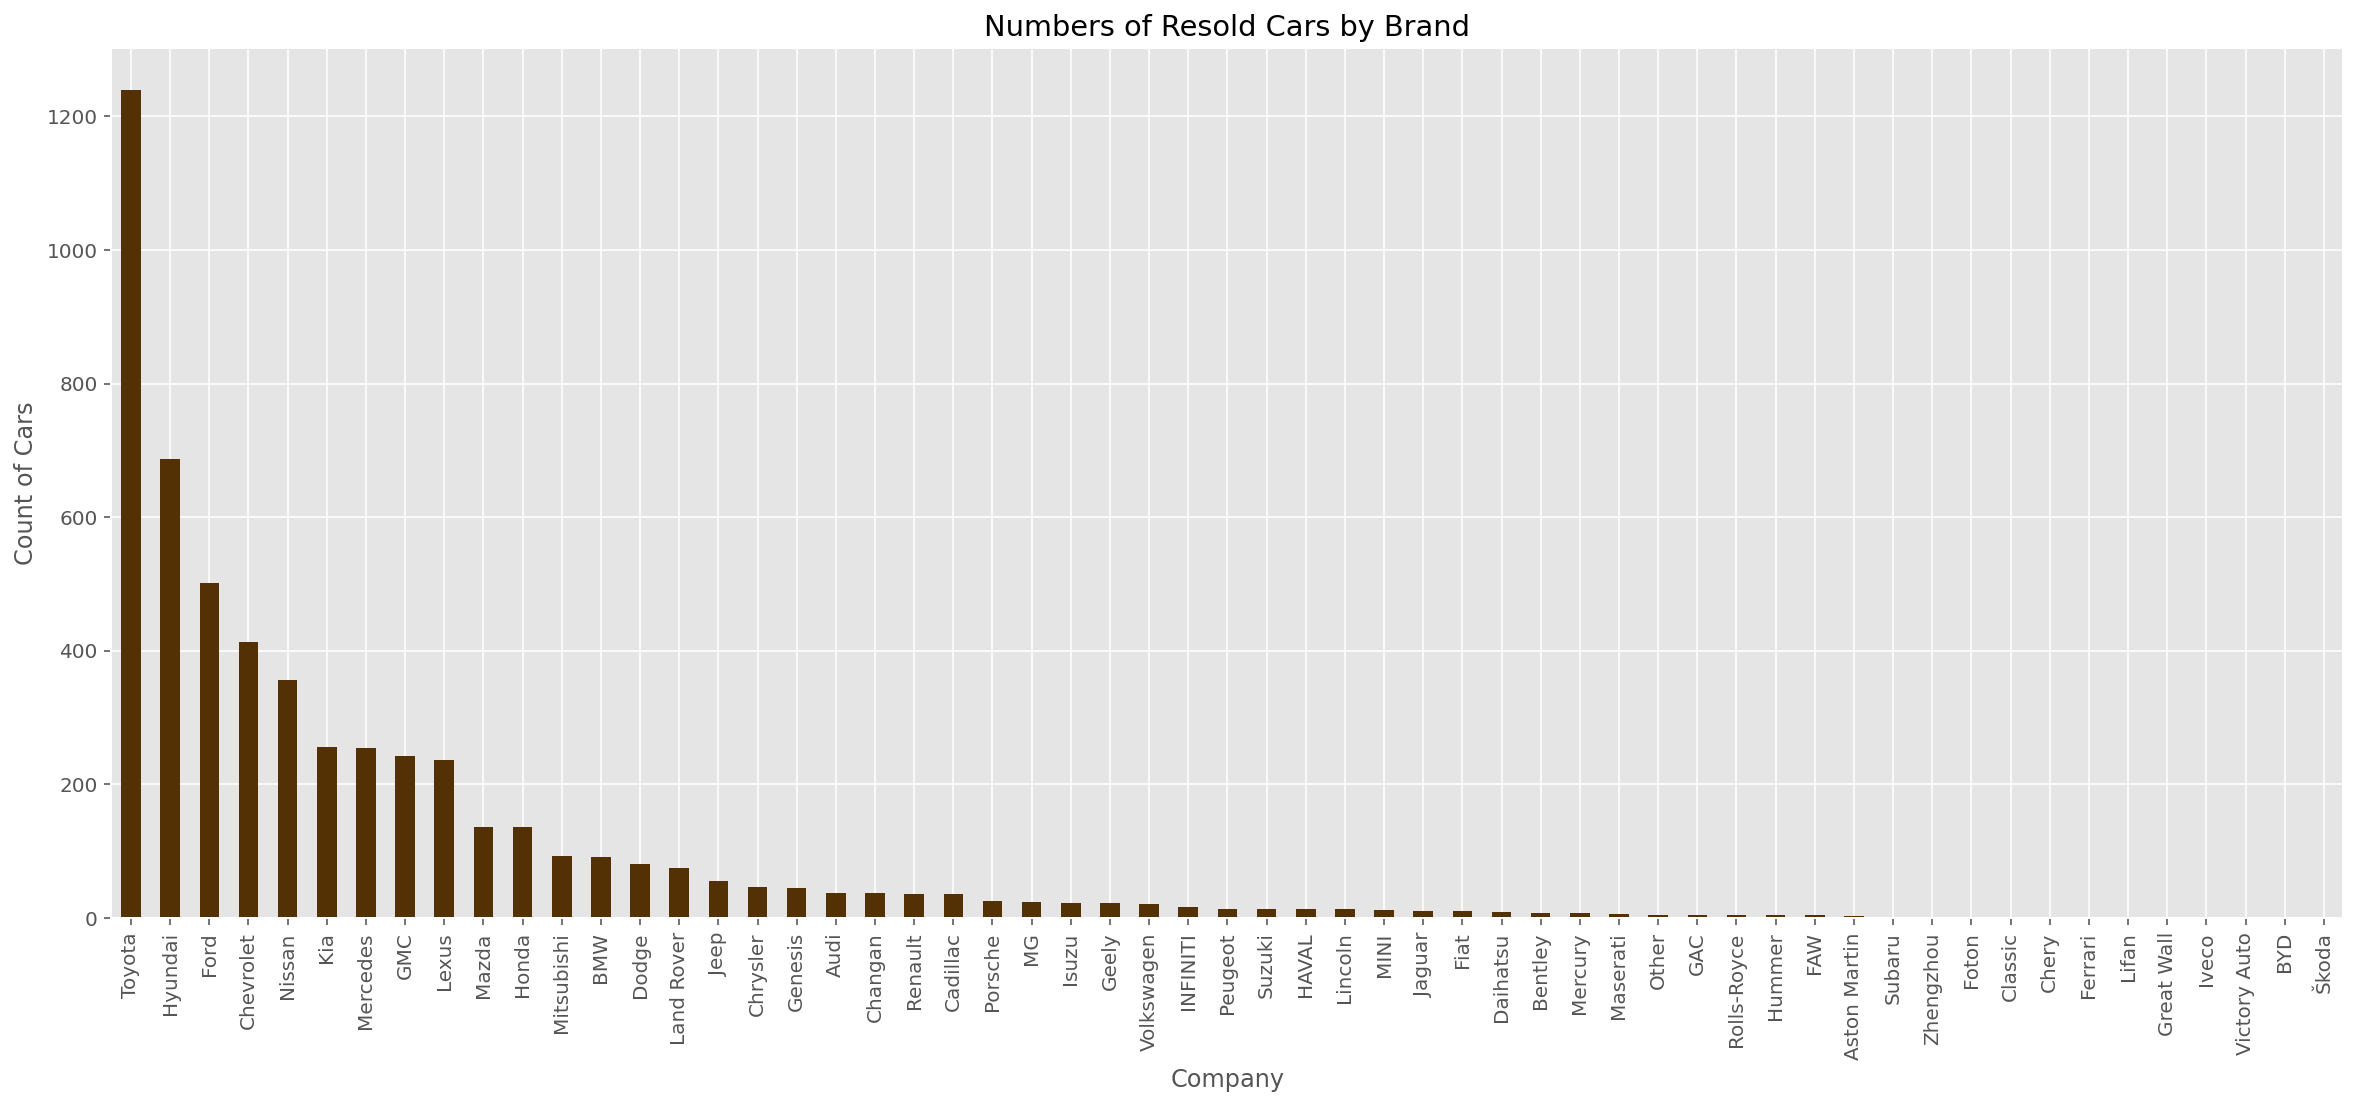

In [19]:
# Visualizing the different car company names available
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = [20,8]
ax = sauc['Make'].value_counts().plot(kind='bar', colormap = 'BrBG')
ax.title.set_text('Numbers of Resold Cars by Brand')
plt.xlabel("Company")
plt.ylabel("Count of Cars");

**Insights:** 


Toyota, Hyundai, and Ford are among the most resold cars.

## Which Regin have the Highest Mileage and Lowest Mileage?

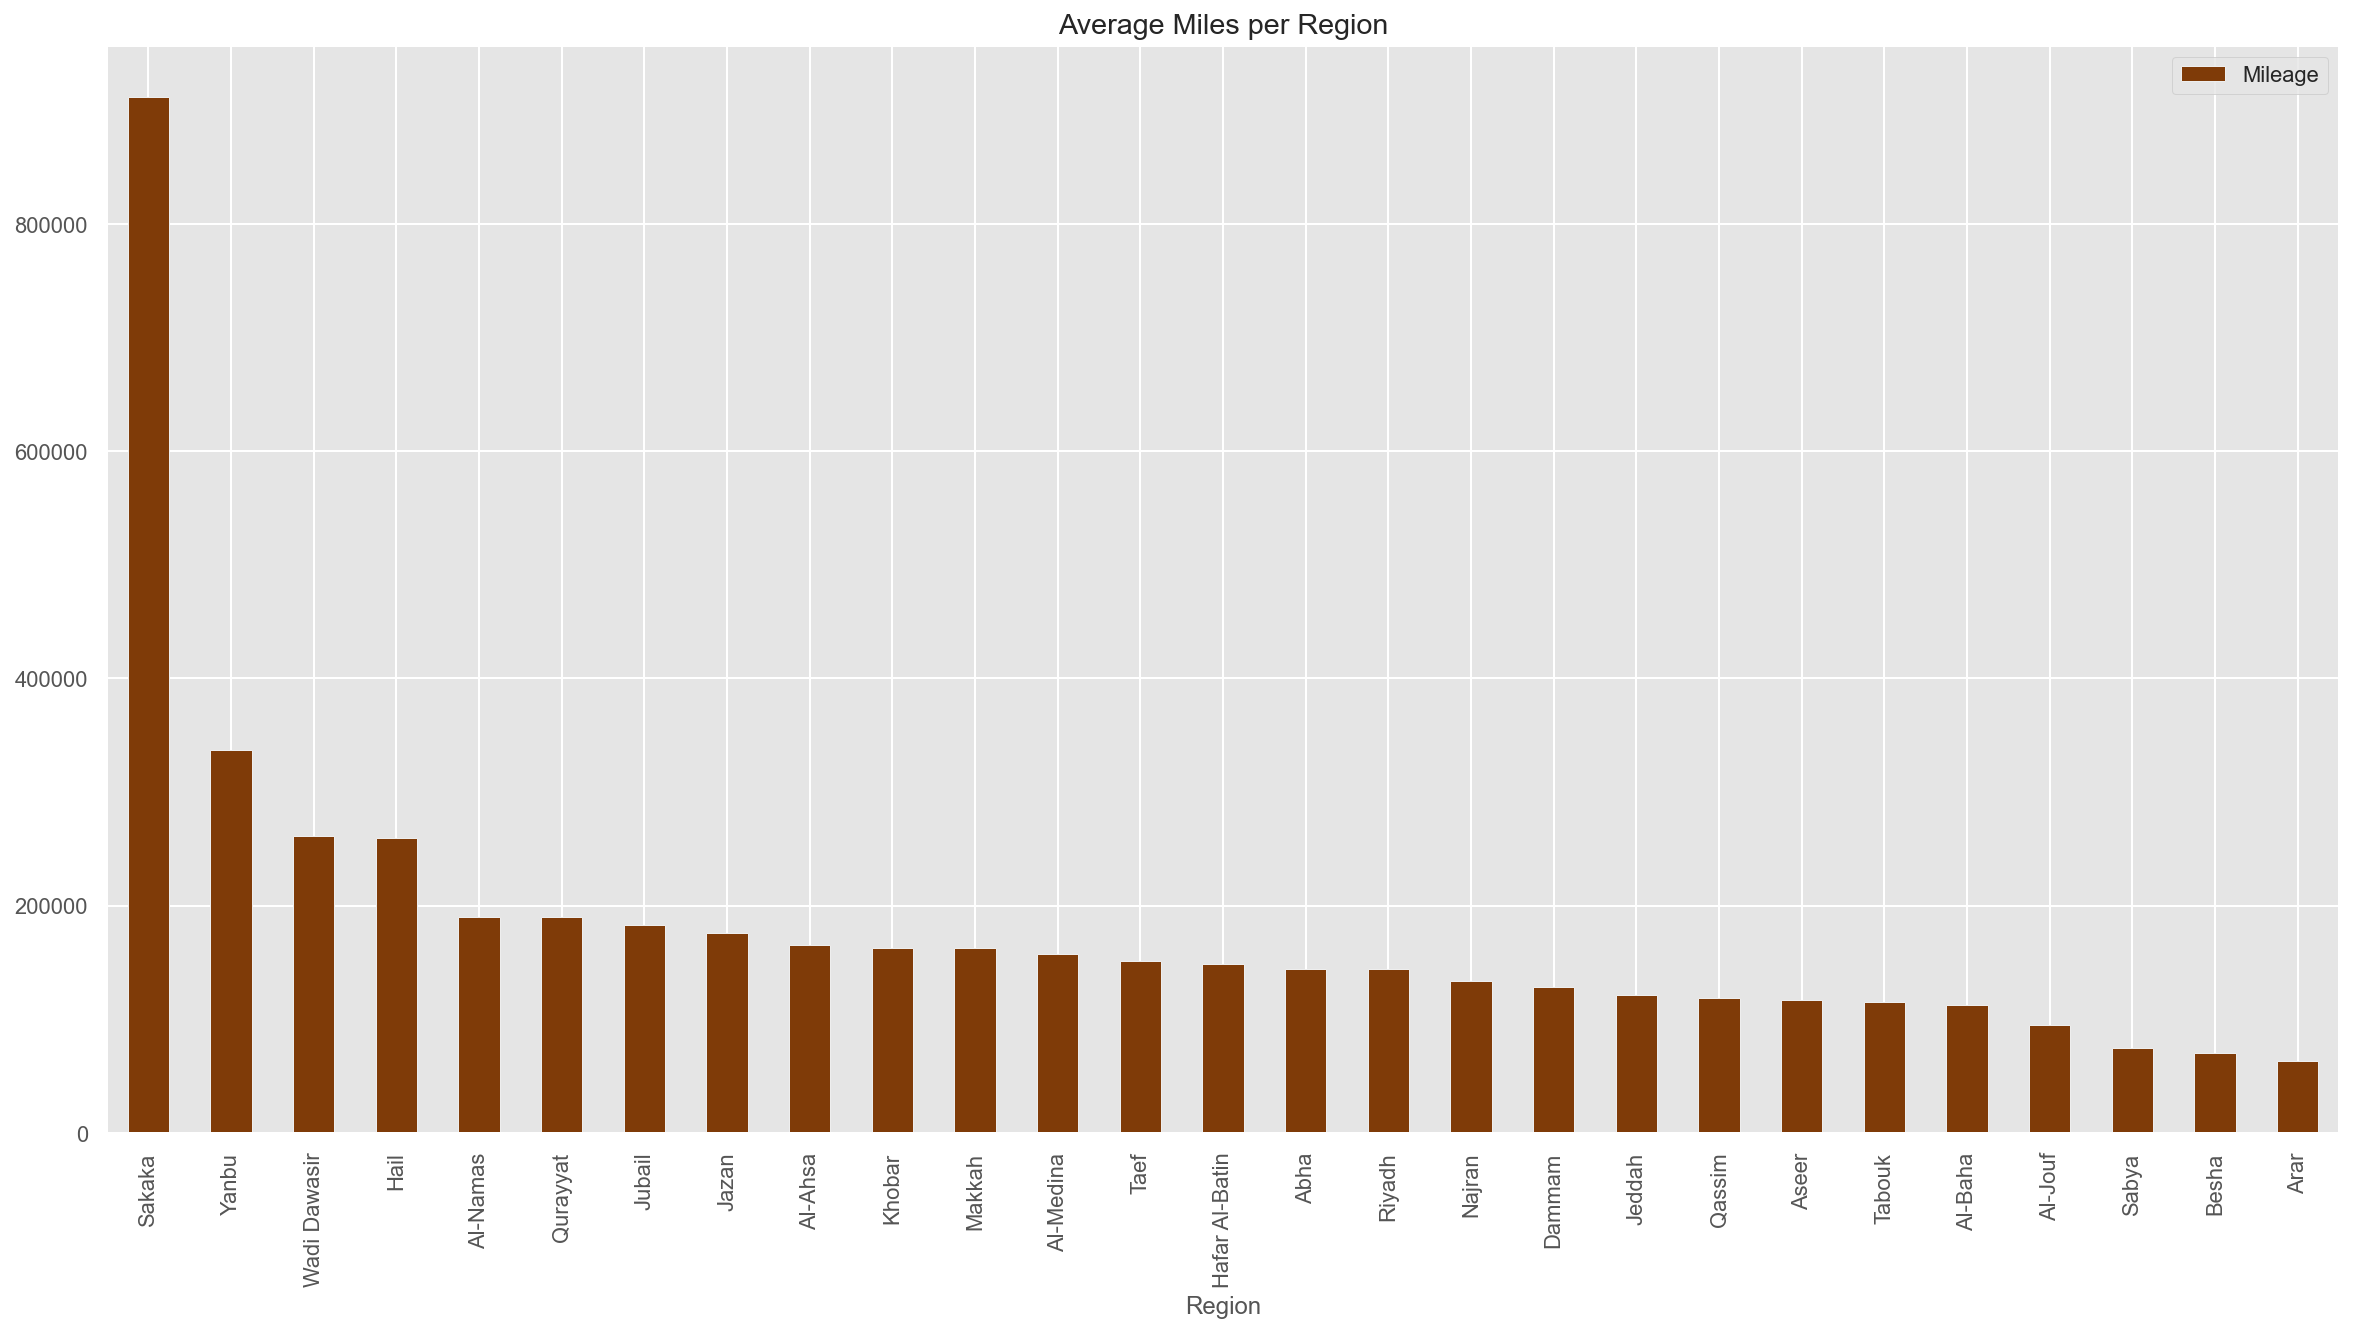

In [45]:
plt.rcParams["figure.figsize"] = (20,10)
saucmr = pd.DataFrame(sauc.groupby(['Region'])['Mileage'].mean().sort_values(ascending = False))
saucmr.plot.bar(colormap = 'PuOr')
plt.title('Average Miles per Region');

#### **Insights:** 

Skaka is the highest mileage while Arar is lowest mileage.

## What Is The Average Price In Each Region?

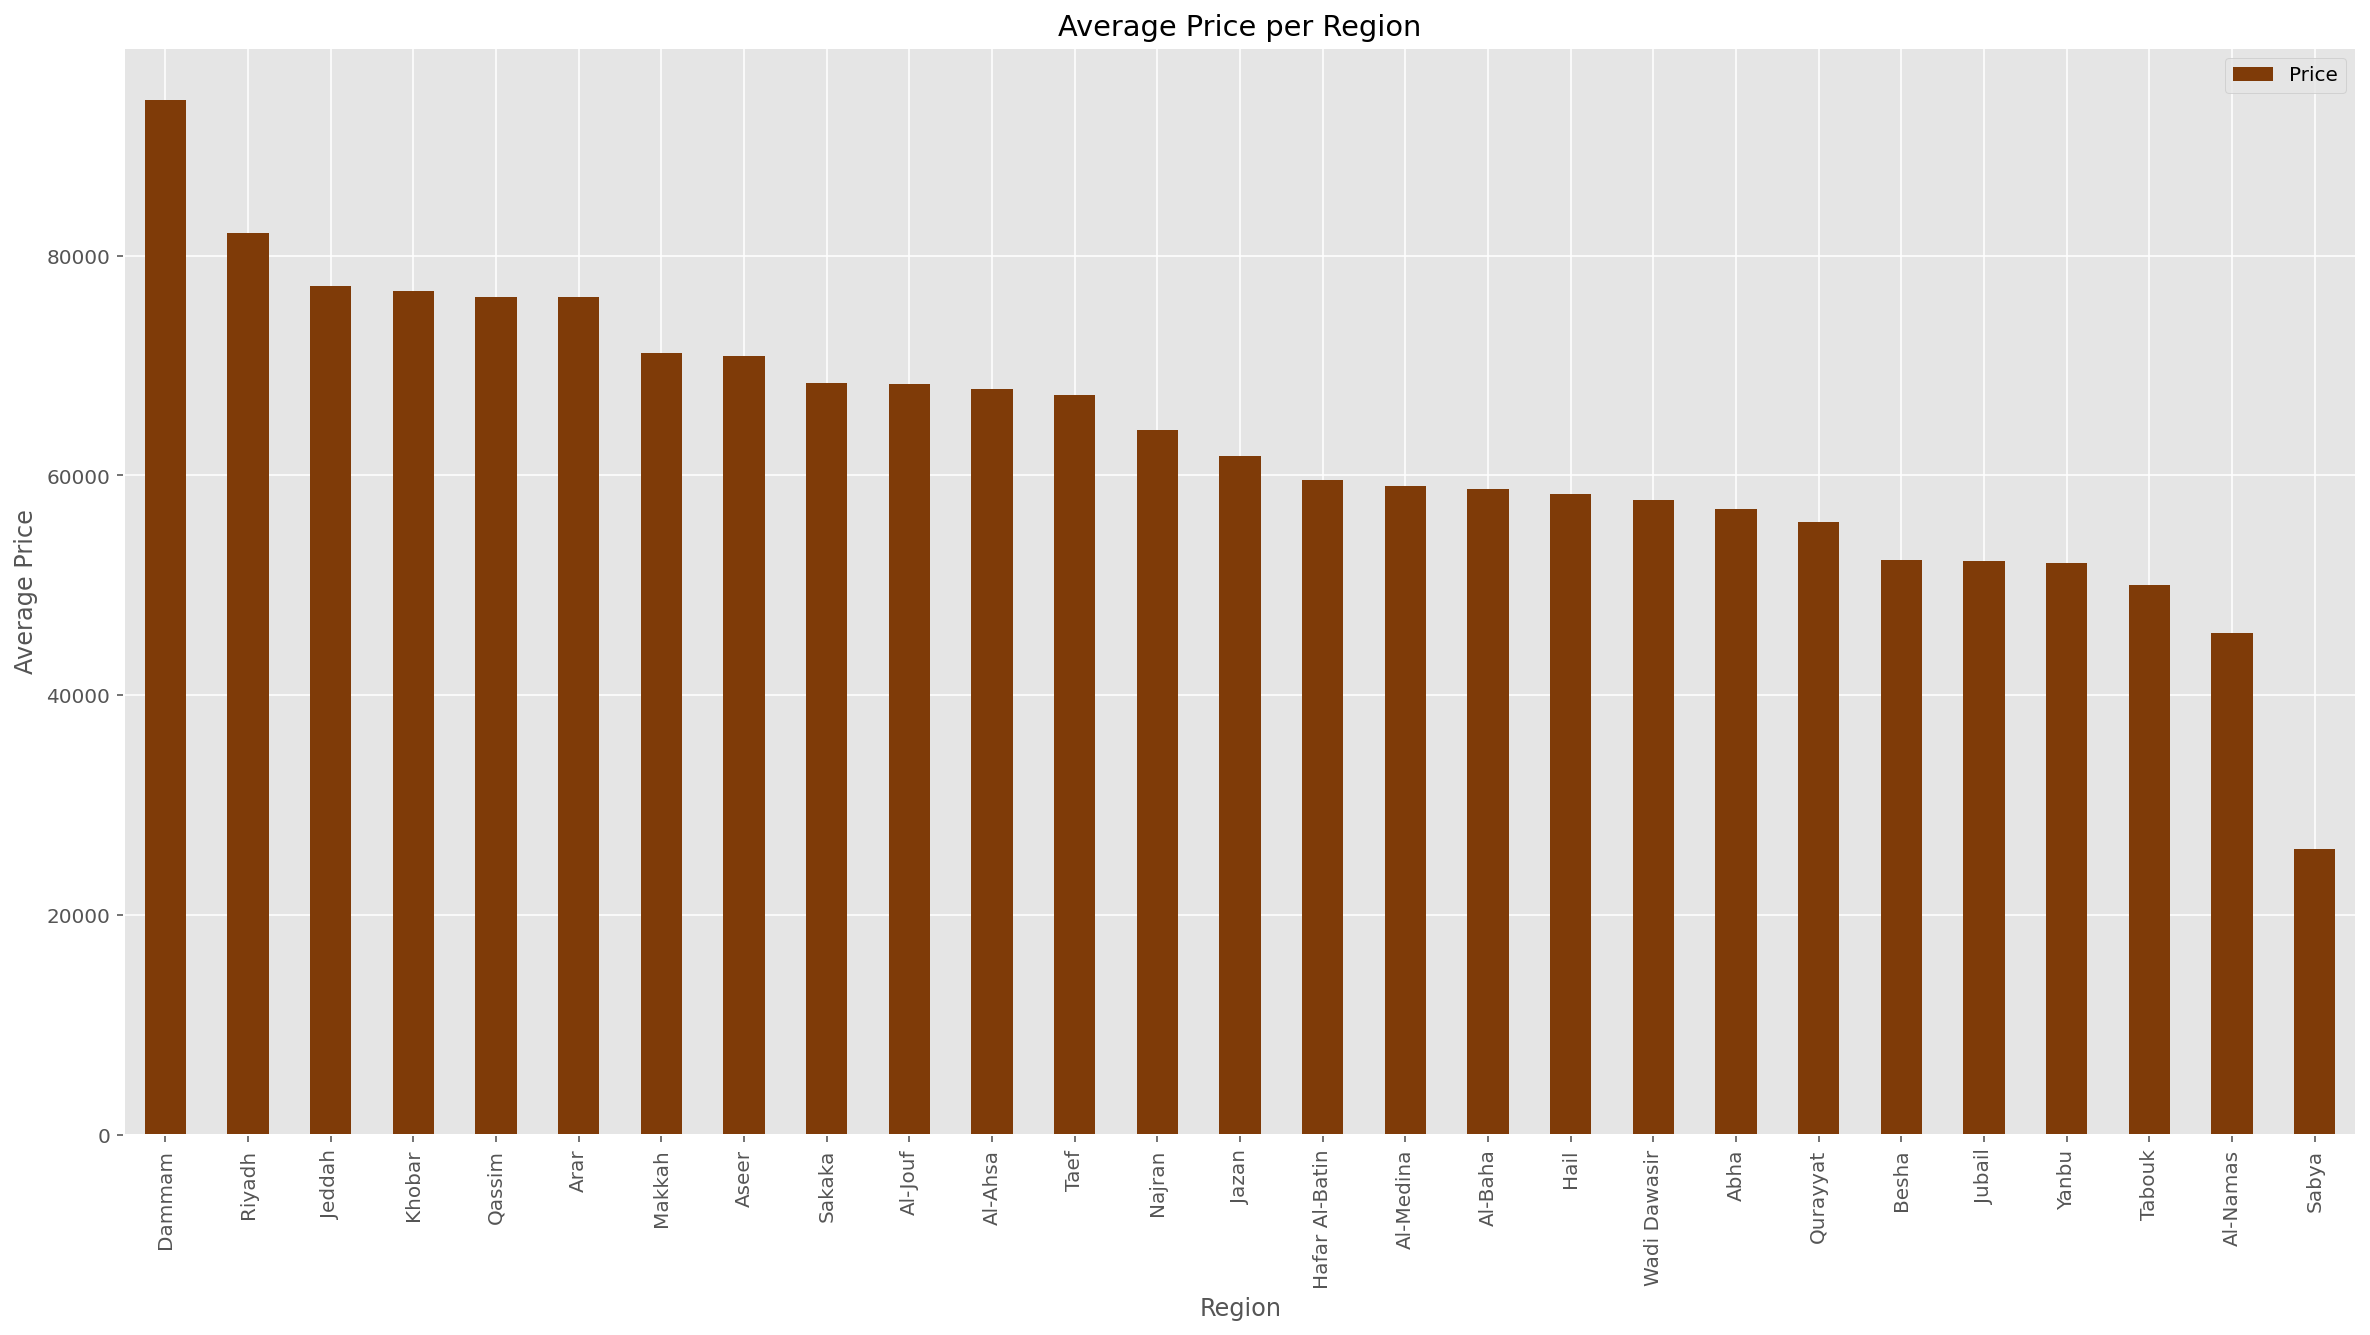

In [20]:
plt.rcParams["figure.figsize"] = (20,10)
saucpr = pd.DataFrame(sauc.groupby(['Region'])['Price'].mean().sort_values(ascending = False))
saucpr.plot.bar(colormap = 'PuOr')
plt.title('Average Price per Region')
plt.ylabel("Average Price");

**Insights:**


Dammam, Riyadh, and Jeddah are cities where the most cars are sold.

 ##  What Is The Most Popular Cars Color?

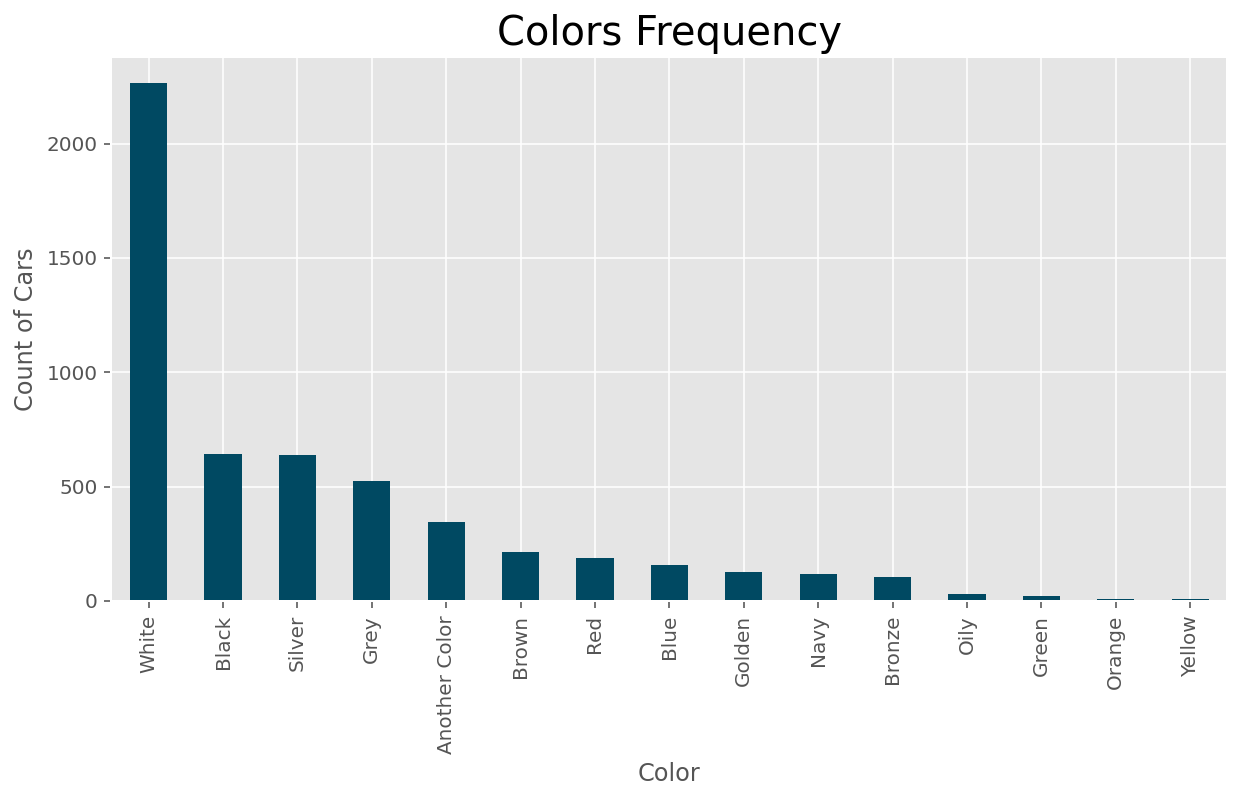

In [21]:
####First plot (Color bar chart)
plt.figure(figsize=(10,5))
sauc.Color.value_counts().plot(kind='bar', rot=90, color='#004962')
plt.title('Colors Frequency', fontsize=20)
plt.xlabel('Color')
plt.ylabel('Count of Cars');

**Insights:**

White, black & silver are the most common colors whereas green, orange & yellow are the least frequent.

## What Is The Resold Cars Price?

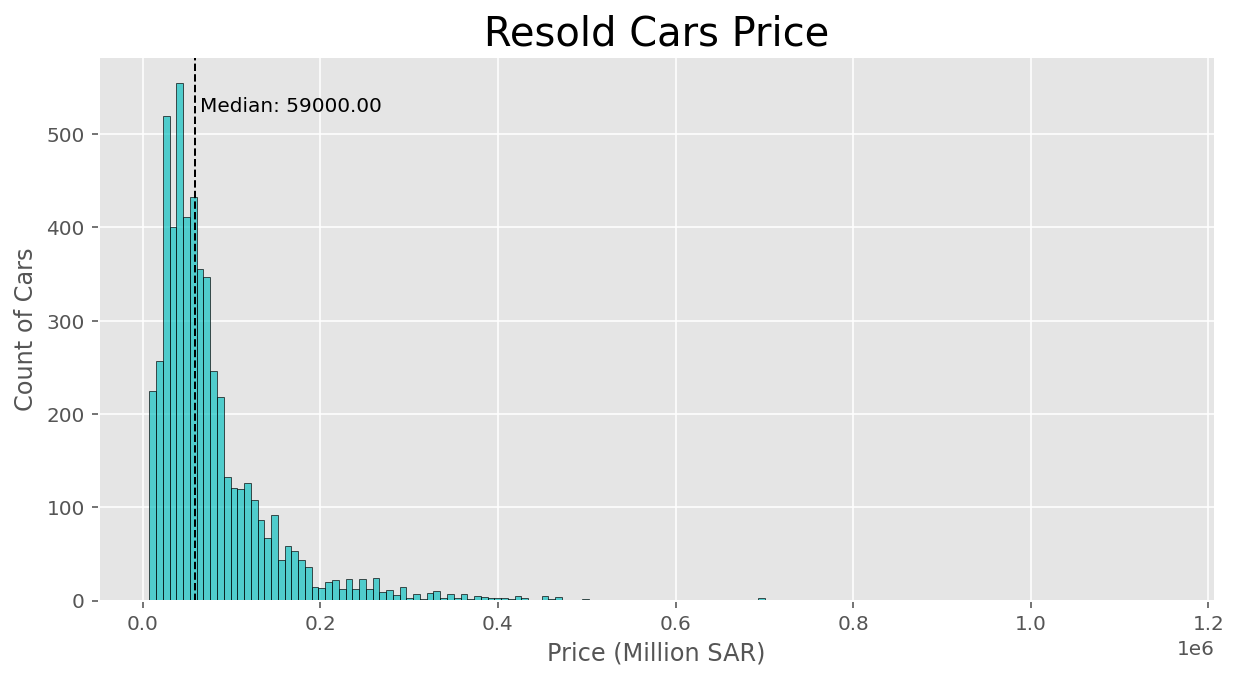

In [22]:
###Second plot (Cars Price)
plt.figure(figsize=(10,5))
np.random.seed(6789)
x = sauc['Price']
result = plt.hist(x, bins=150, color='c', edgecolor='k', alpha=0.65)
plt.axvline(x.median(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(x.median()*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(x.median()))
plt.title('Resold Cars Price', fontsize=20)
plt.xlabel('Price (Million SAR)')
plt.ylabel('Count of Cars');

**Insights:**

Price was positively skewed that's why we showed the median.

## How does the price differ in each company and model year?

C:\Users\RaefS\AppData\Local\Temp\ipykernel_13368\4145142218.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(orientation="vertical", label="Year")


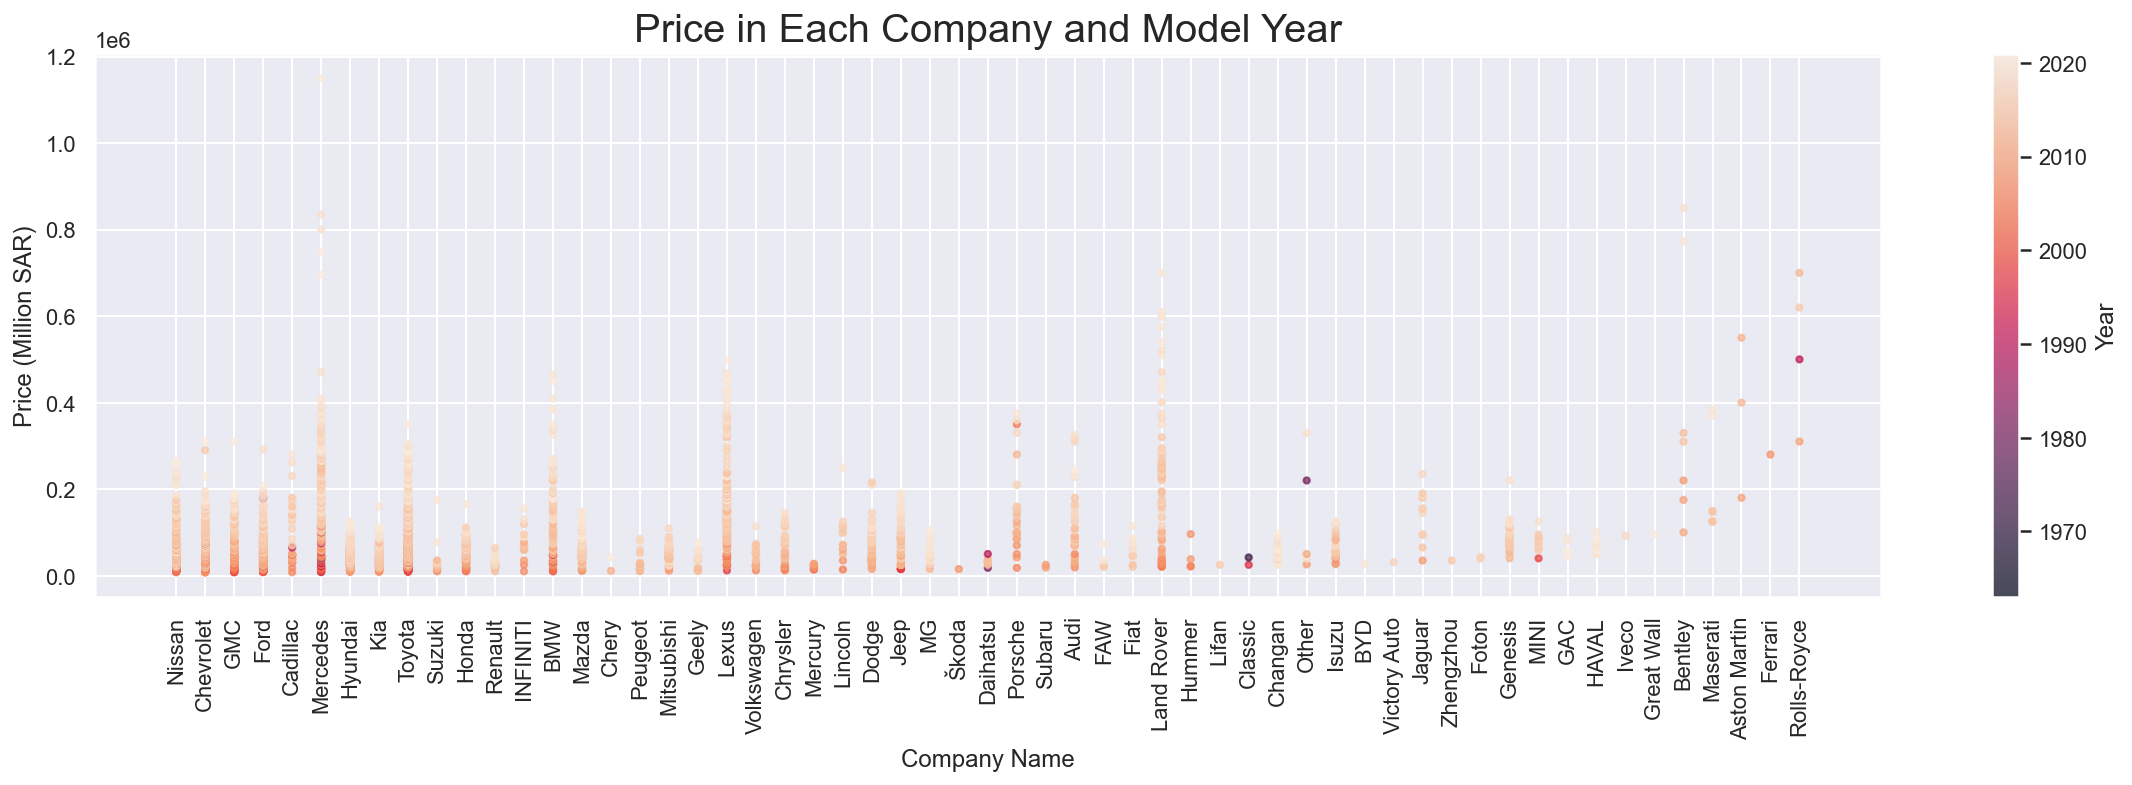

In [38]:
### Third plot (Company & Year Vs Price)
y = sauc['Price']
x = sauc['Make']
colors = sauc['Year']
plt.figure(figsize=(20, 5))
plt.scatter(x,y, s=10, c=colors, alpha=0.7)
plt.colorbar(orientation="vertical", label="Year")
plt.title('Price in Each Company and Model Year', fontsize=20)
plt.xlabel('Company Name')
plt.ylabel('Price (Million SAR)')
plt.xticks(rotation=90);

**Insights:**

This plot shows the price according to each company & year, Marcedes has the heighest price followed by Bentley & Rolls-Royce.
not surprisingly, most price increase as the car's year increase (The newer the car, the heigher the price).

## Which car options are in the market?

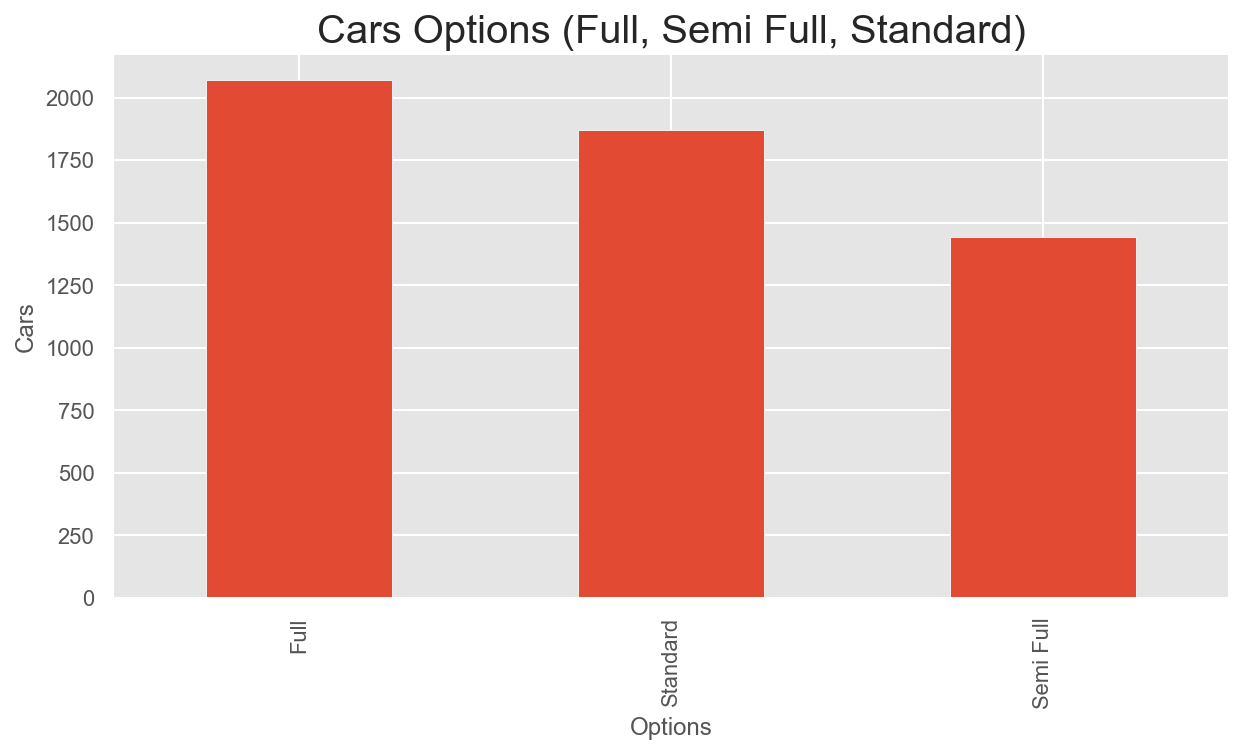

In [39]:
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
fig = plt.figure(figsize=(10,5))
sauc.Options.value_counts().plot(kind='bar', rot=90)
plt.title('Cars Options (Full, Semi Full, Standard)', fontsize=20)
plt.xlabel('Options')
plt.ylabel('Cars');

**Insights:**

The full option cars has the highest number of cars

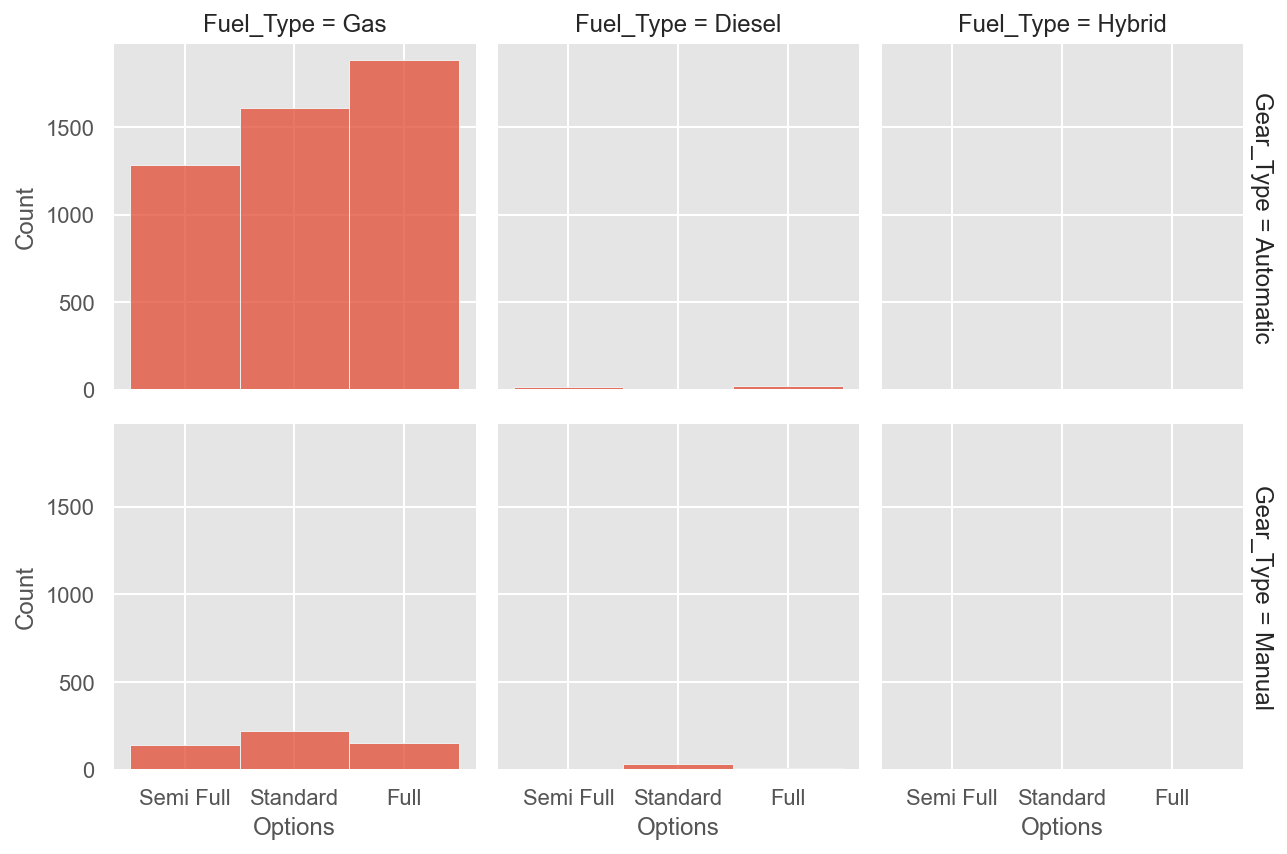

In [40]:
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
sns.displot(
    sauc, x="Options", col="Fuel_Type",  row="Gear_Type",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
);

## Which Cars Options Are Most Popular and Does that affect the Price?

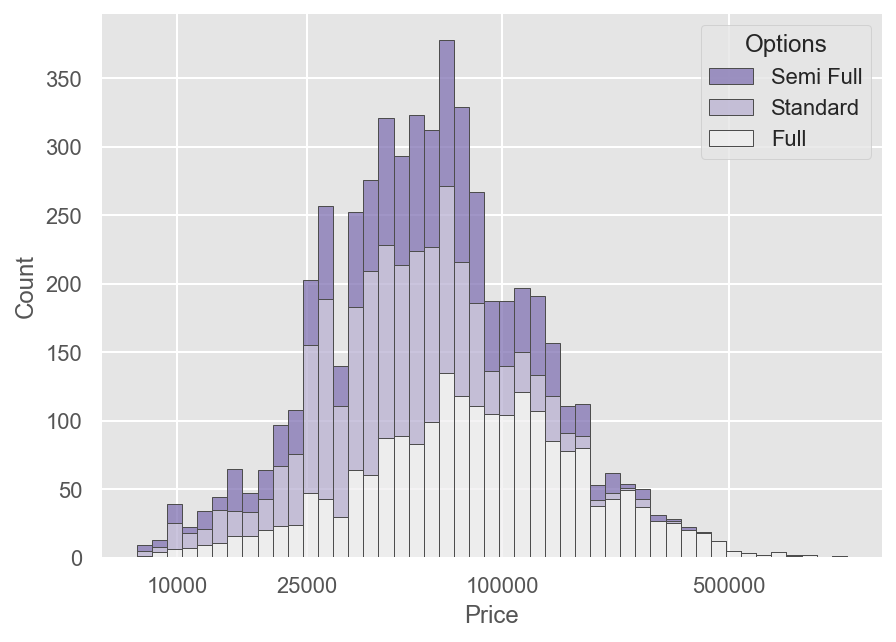

In [43]:
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    sauc,
    x="Price", hue="Options",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([10000, 25000, 100000, 500000]);

**Insights:**
- Semi full option cars are the least sold cars, while most of the sold cars are full option, in general.
- As the price increases, the sold cars are more likely to be full option.

In [42]:
cars_t = sauc.loc[(sauc['Make'] == 'Toyota') & (sauc['Year'] > 1999)]
cars_t

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable,Engine_class
3849,Toyota,Corolla,2001,Saudi,Another Color,Standard,8.1,Gas,Manual,600,Jazan,9500,False,Large
4870,Toyota,Corolla,2001,Saudi,Silver,Semi Full,1.3,Gas,Manual,600000,Dammam,10000,False,Small
1580,Toyota,Echo,2001,Saudi,Another Color,Standard,1.5,Gas,Manual,480000,Jeddah,10000,False,Small
1472,Toyota,Camry,2001,Saudi,White,Full,1.4,Gas,Manual,399000,Jubail,10000,False,Small
2417,Toyota,Camry,2000,Saudi,White,Semi Full,1.3,Gas,Manual,4000,Makkah,10000,False,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6340,Toyota,Land Cruiser,2021,Saudi,White,Full,4.6,Gas,Automatic,8000,Dammam,295000,False,Small
5555,Toyota,Land Cruiser,2021,Saudi,White,Full,4.6,Gas,Automatic,20000,Dammam,296000,False,Small
1754,Toyota,Land Cruiser,2019,Saudi,White,Full,5.7,Gas,Automatic,6000,Dammam,298000,False,Large
2843,Toyota,Land Cruiser,2020,Saudi,White,Full,5.7,Gas,Automatic,30000,Dammam,305000,False,Large


## How does the fuel type change overtime? (Toyota as an example)

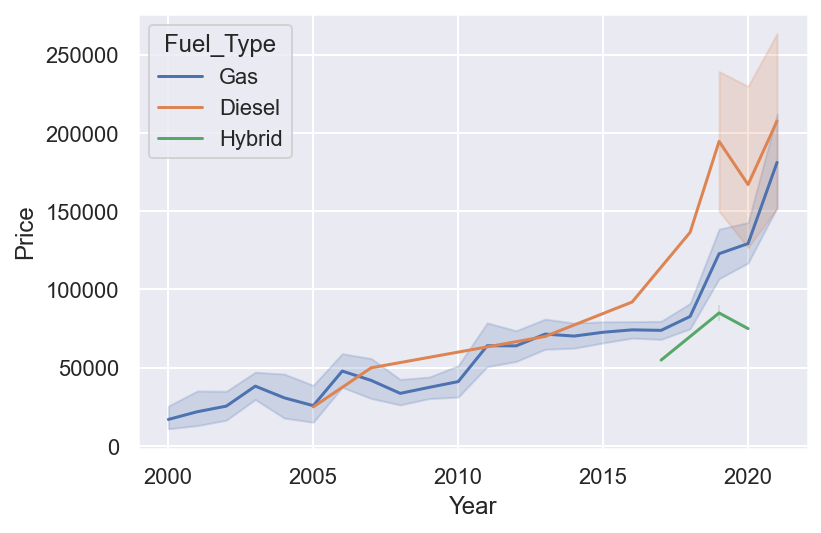

In [29]:
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="Year", y="Price",
             hue="Fuel_Type", 
             data=cars_t);

**Insights:**
- As an example, we took the sample of Toyota cars (as Toyota has the higher frequency) from 2000 onward. We see that Diesel used cars had lower prices in 2005, but with the time it got higher than Gas used cars. Moreover, note the behavior of the Hybrid used cars.

## Does the engine class proportion change in the new model cars?

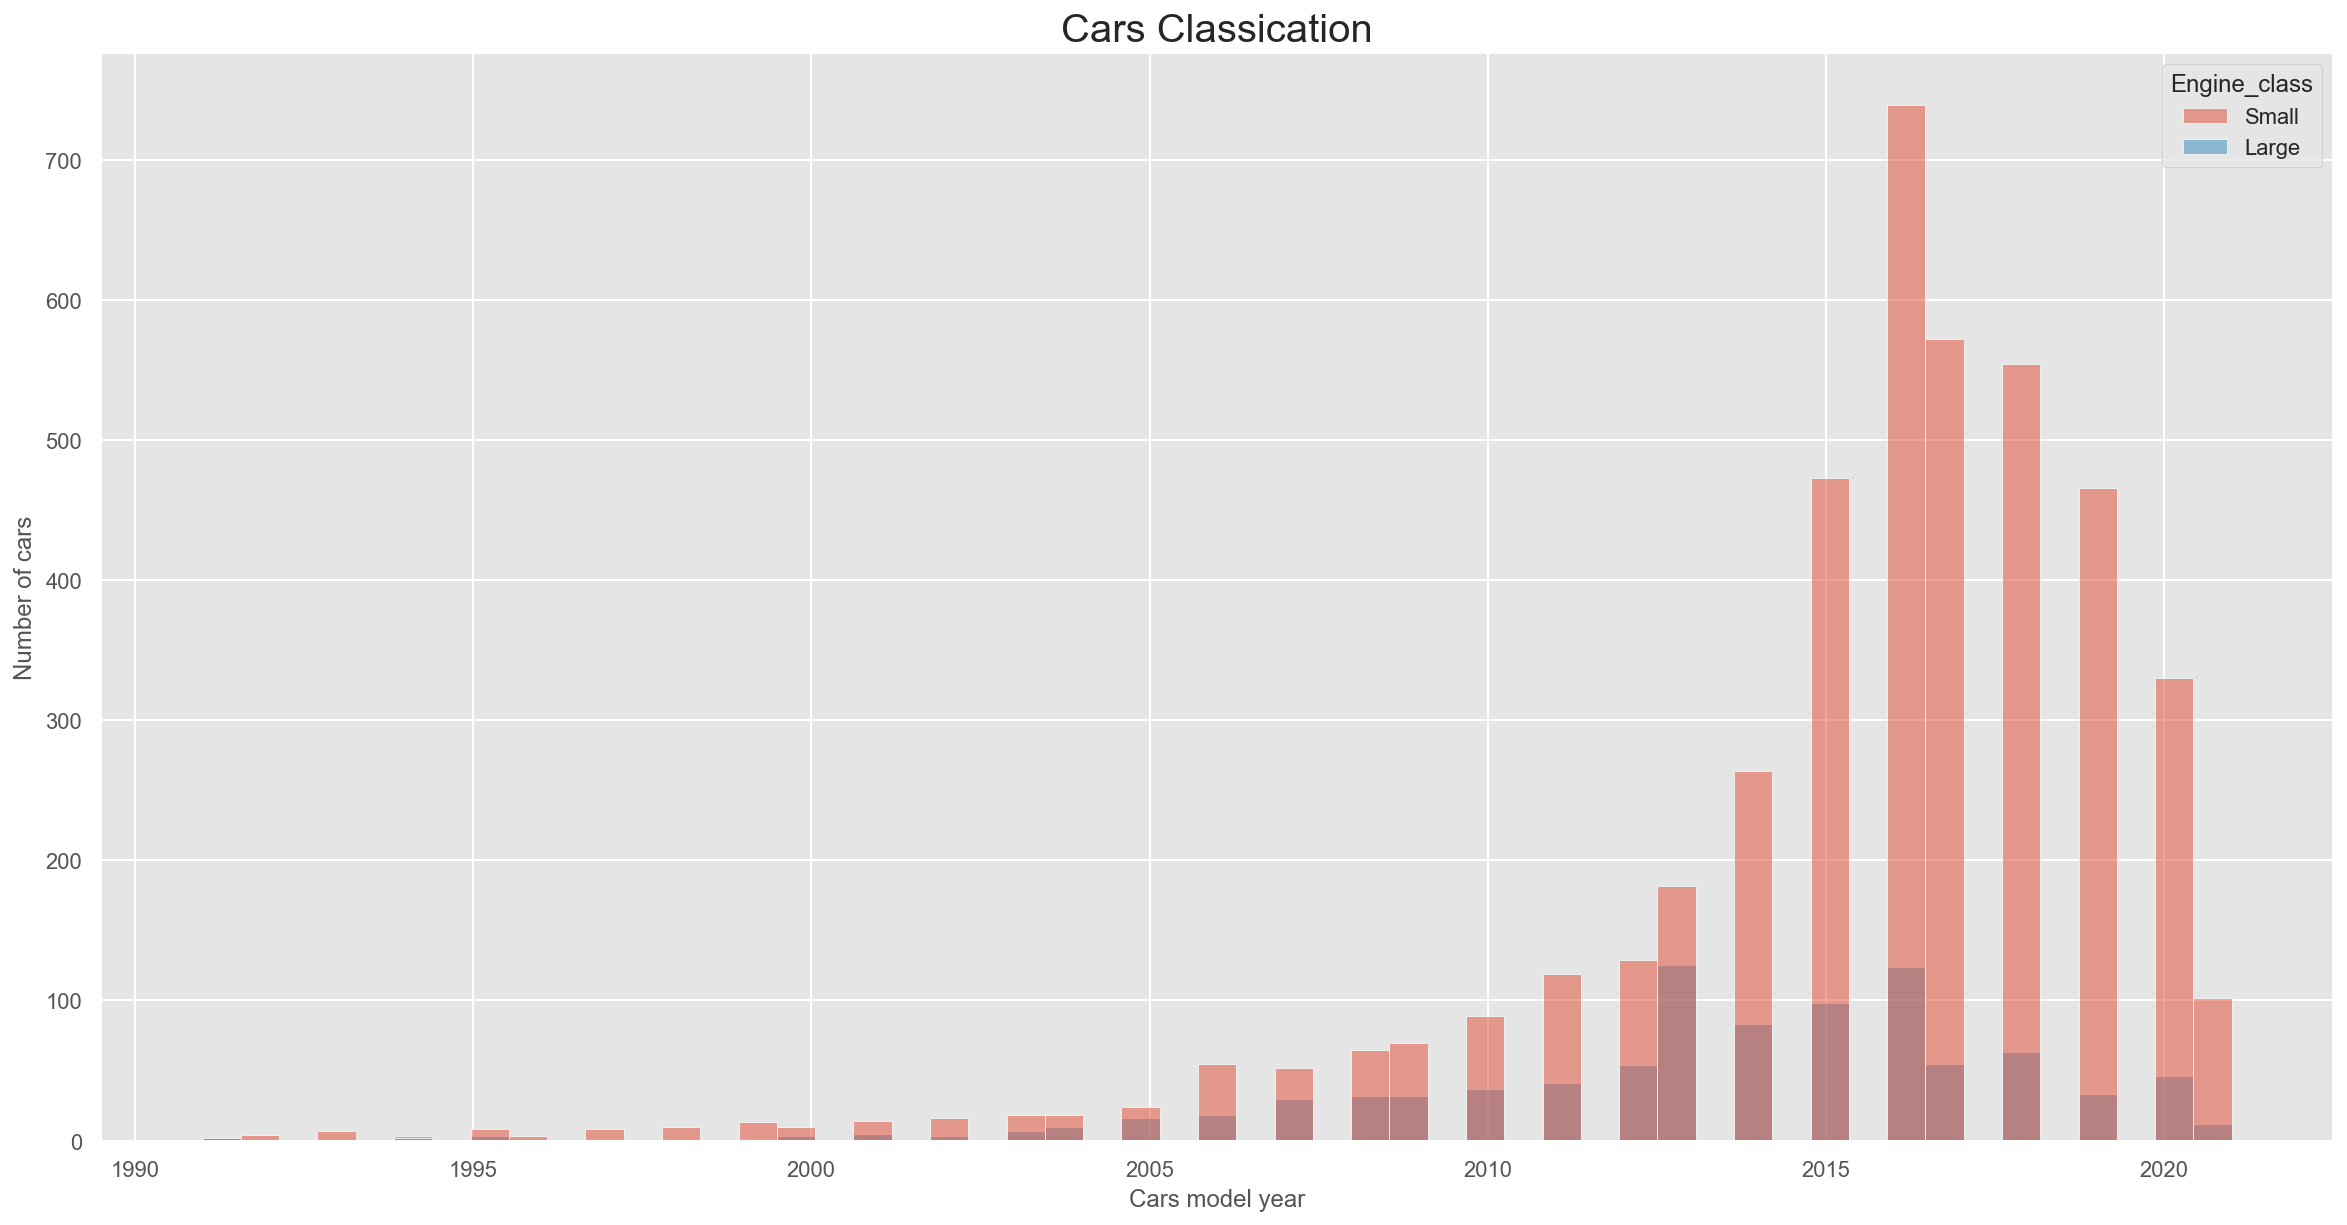

In [49]:
# make a new column that classifies the engine size
sauc['Engine_class'] = sauc['Engine_Size'].apply(lambda x : 'Small' if x < 5 else 'Large') 
ax = sns.histplot(x = 'Year' , hue = 'Engine_class', data = sauc[sauc["Year"] > 1990 ]) 
ax.set(xlabel='Cars model year', ylabel='Number of cars') 
plt.title('Cars Classication', fontsize=20);


**Insights:**

The cars listed in the website with a model from 2014 onward are domianted by small cars whereas the older cars 
have almost an equal  propotion

### Correlation  matrix to show which variable affect the price for the overall dataset 

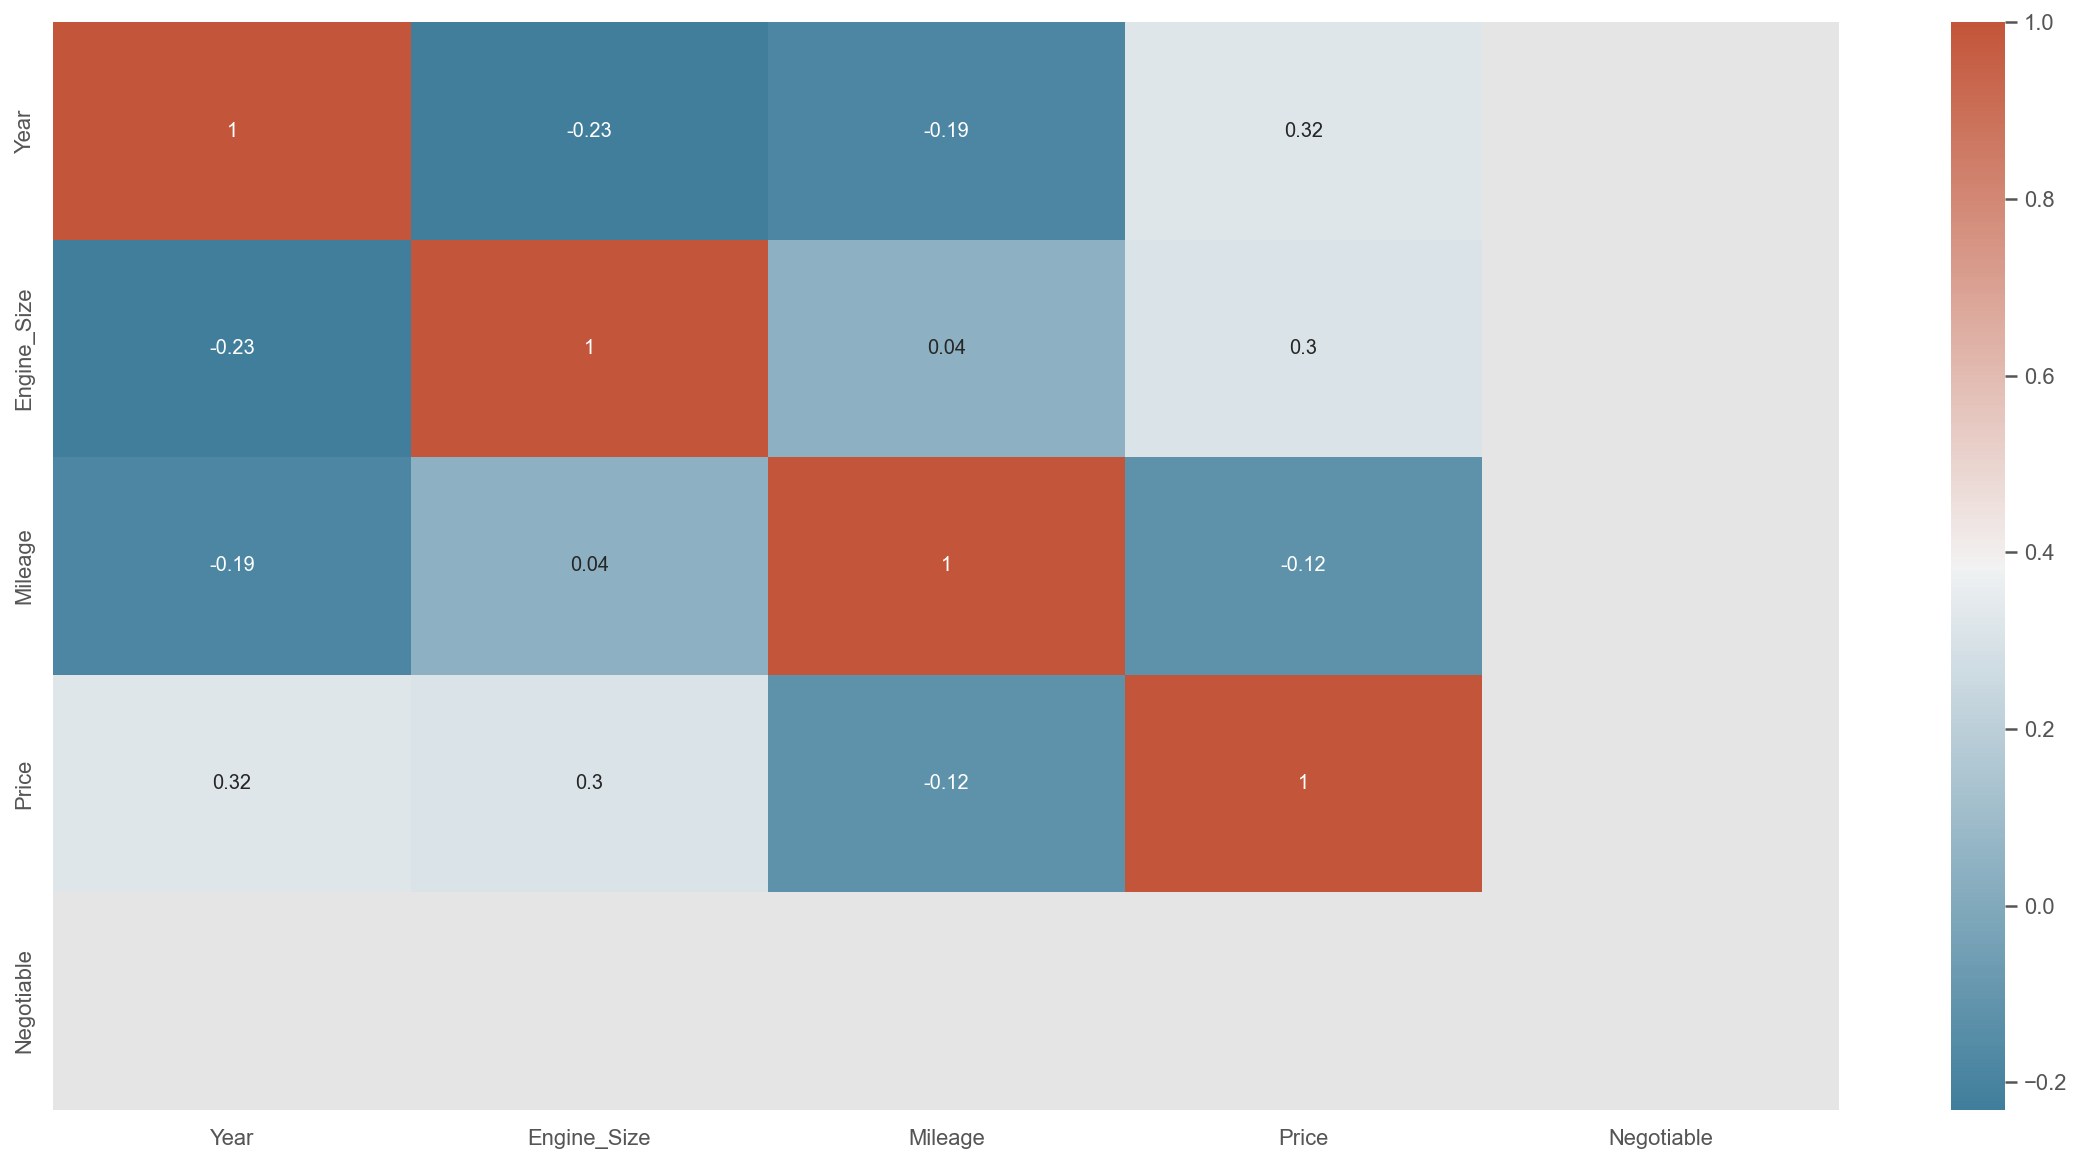

In [50]:
# first a general corr then a corr based on every car cmopany 
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(sauc.corr(), annot=True, cmap=cmap);

**Insights:**

The engine size and the model year have a similar positive effect and the model year has the highest effect
 on the price for the overall dataset

### More analysis to see what is the variable that affect the price for the top car makers?

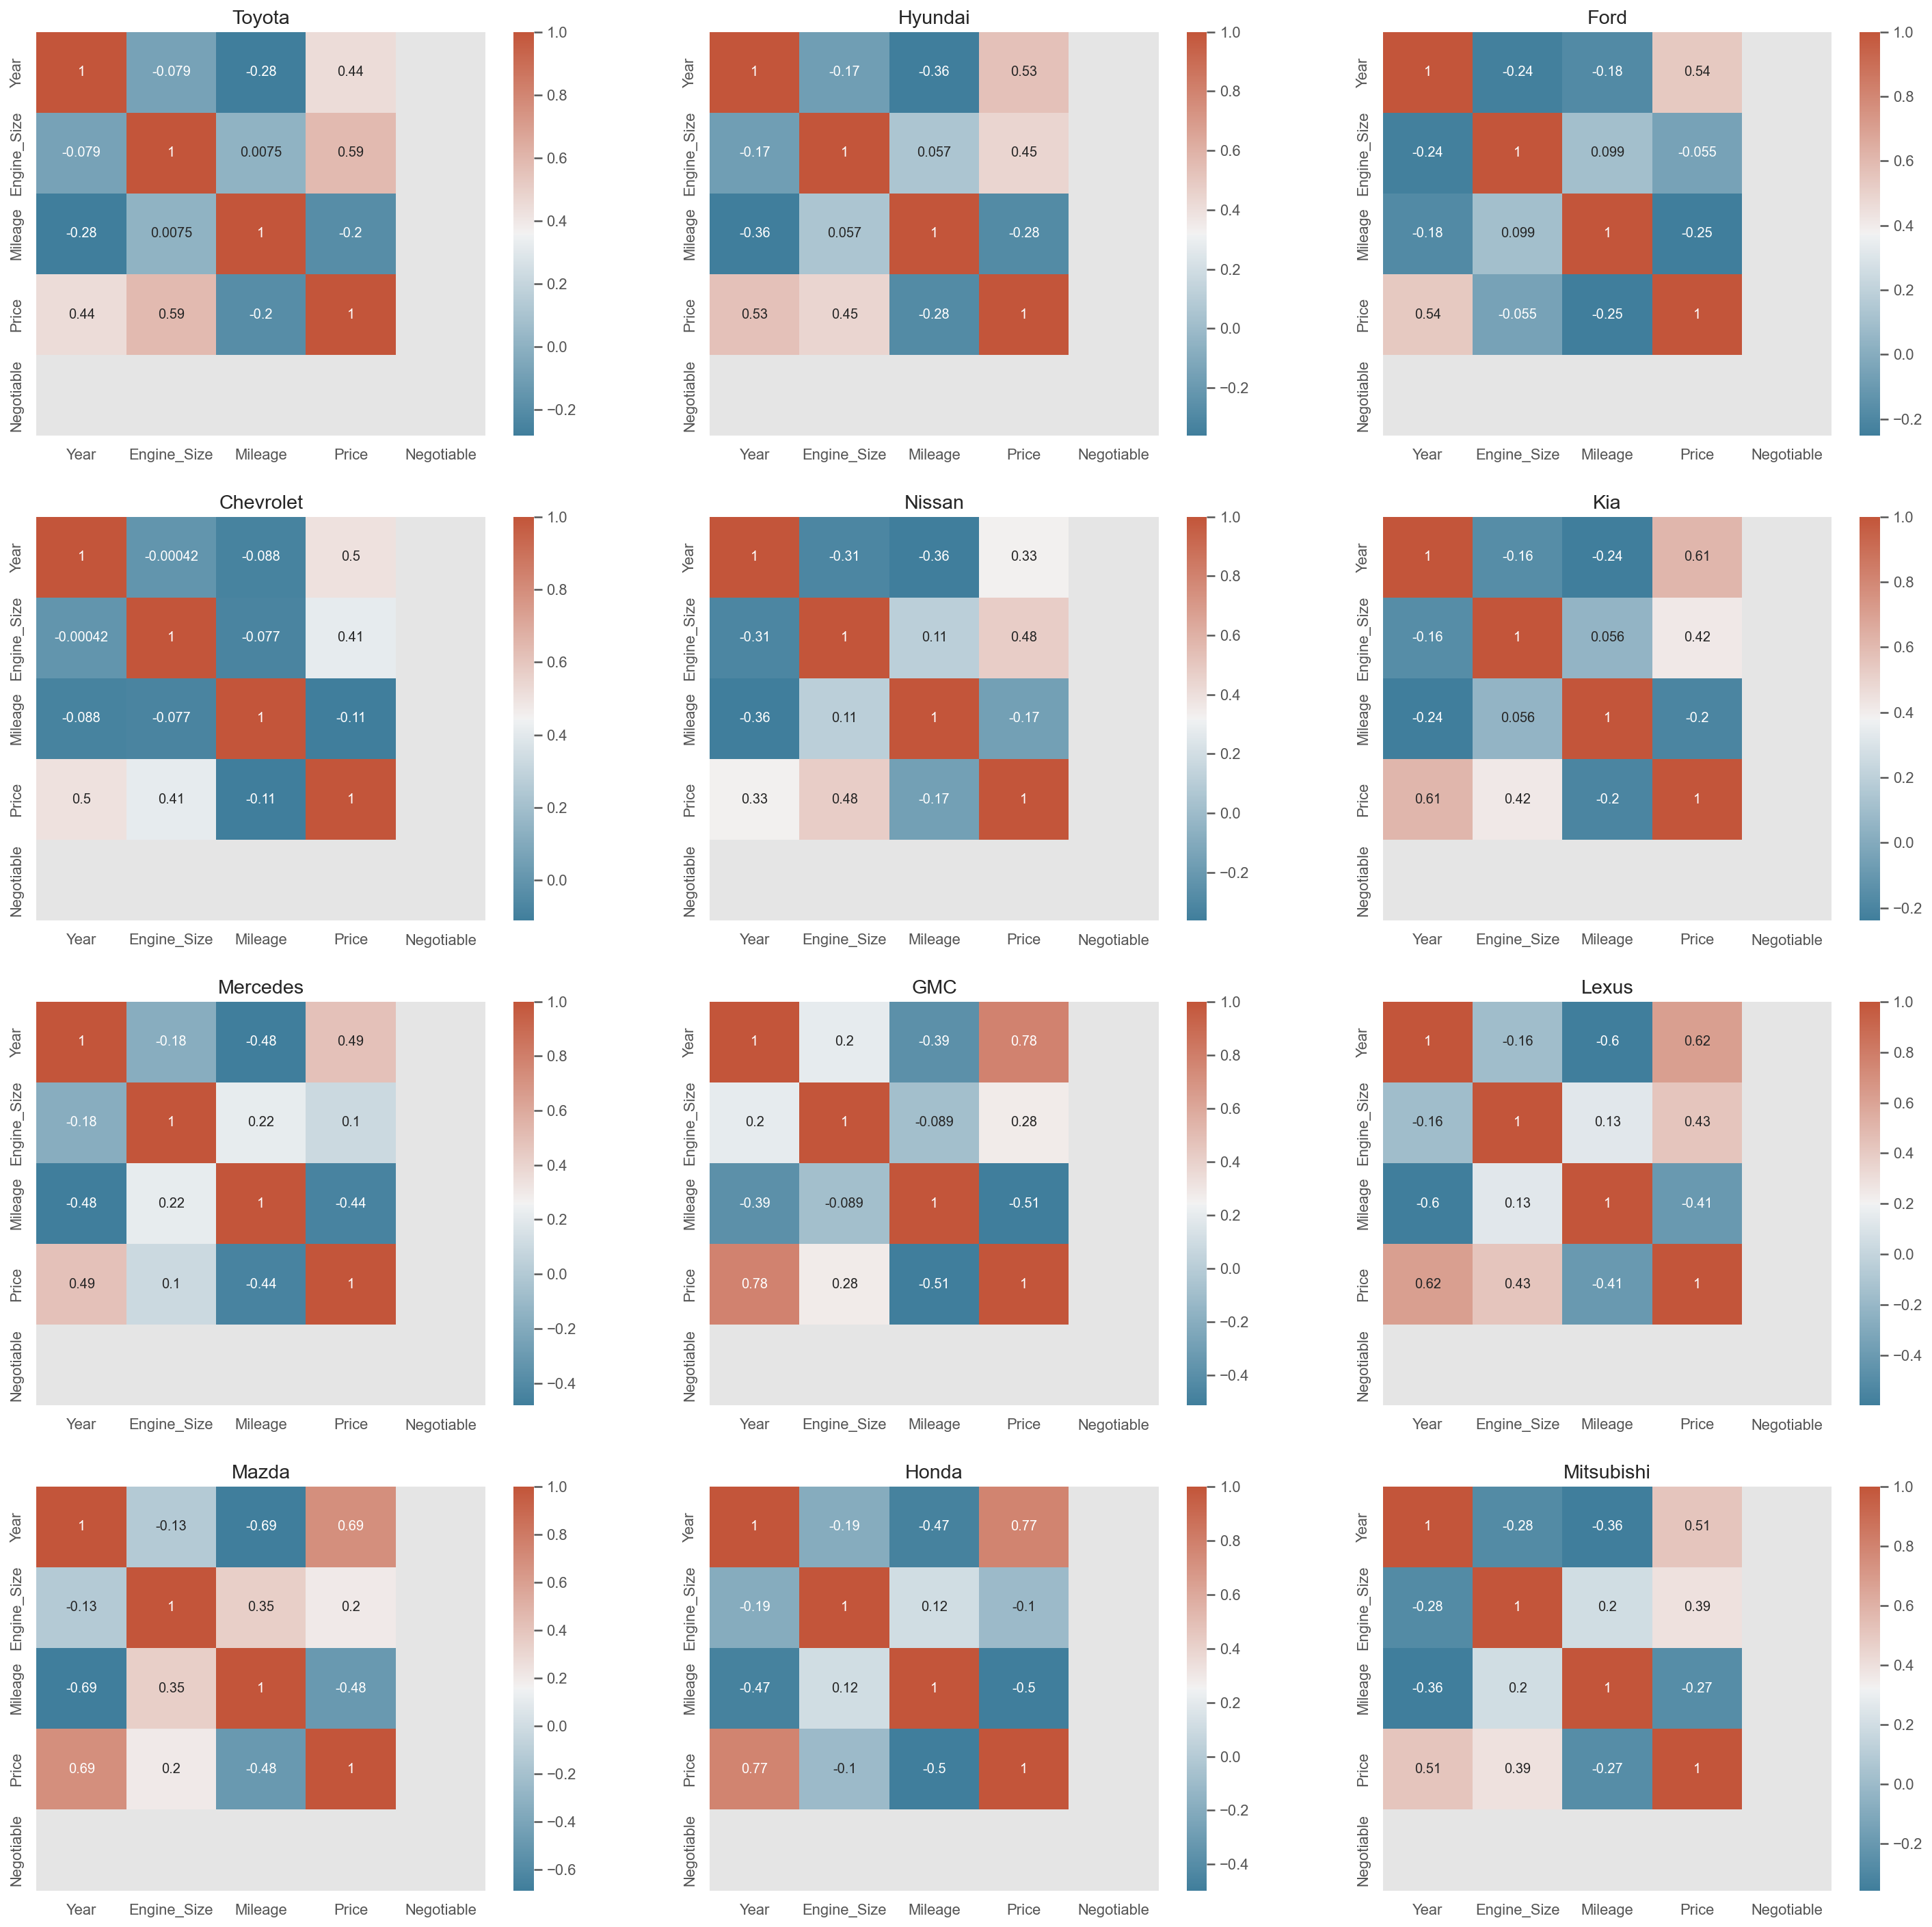

In [51]:
# First we take the unique values in 'Make' and the count for them. 
# The following code will creat a list for the maker names and for the count and make it a dict
maker_name, cars_counts = np.unique(sauc['Make'],return_counts=True)
d = dict(zip(maker_name,cars_counts))
top = {}
# Creat a new dict where we only have the top 12 cars makers as they represent 85% of the dataset 
for key, value in sorted(d.items(), key=lambda item: item[1], reverse= True)[:12]:
    top[key] = value  
nCols=3   # The number of columns that you want
nRows=4   # The number of correspomding rows 

fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,v in enumerate(top.keys()):
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    ax = sns.heatmap(sauc[sauc["Make"]== v ].corr(), annot=True, cmap=cmap,ax=axes.flatten()[ind])
    ax.title.set_text(v) 

plt.show() 

**Insights:**

The top 12 cars makers represent 85% from the dataset. The correlation shows that for 9 companies they follow tha same trend as the the overall dataset but Toyota and Nissan the engine size has the highest effect and Honda 
engine size has a negative effect on the price

### What is the Price Behavior for Used Cars in Both the Fuel & Gear? 

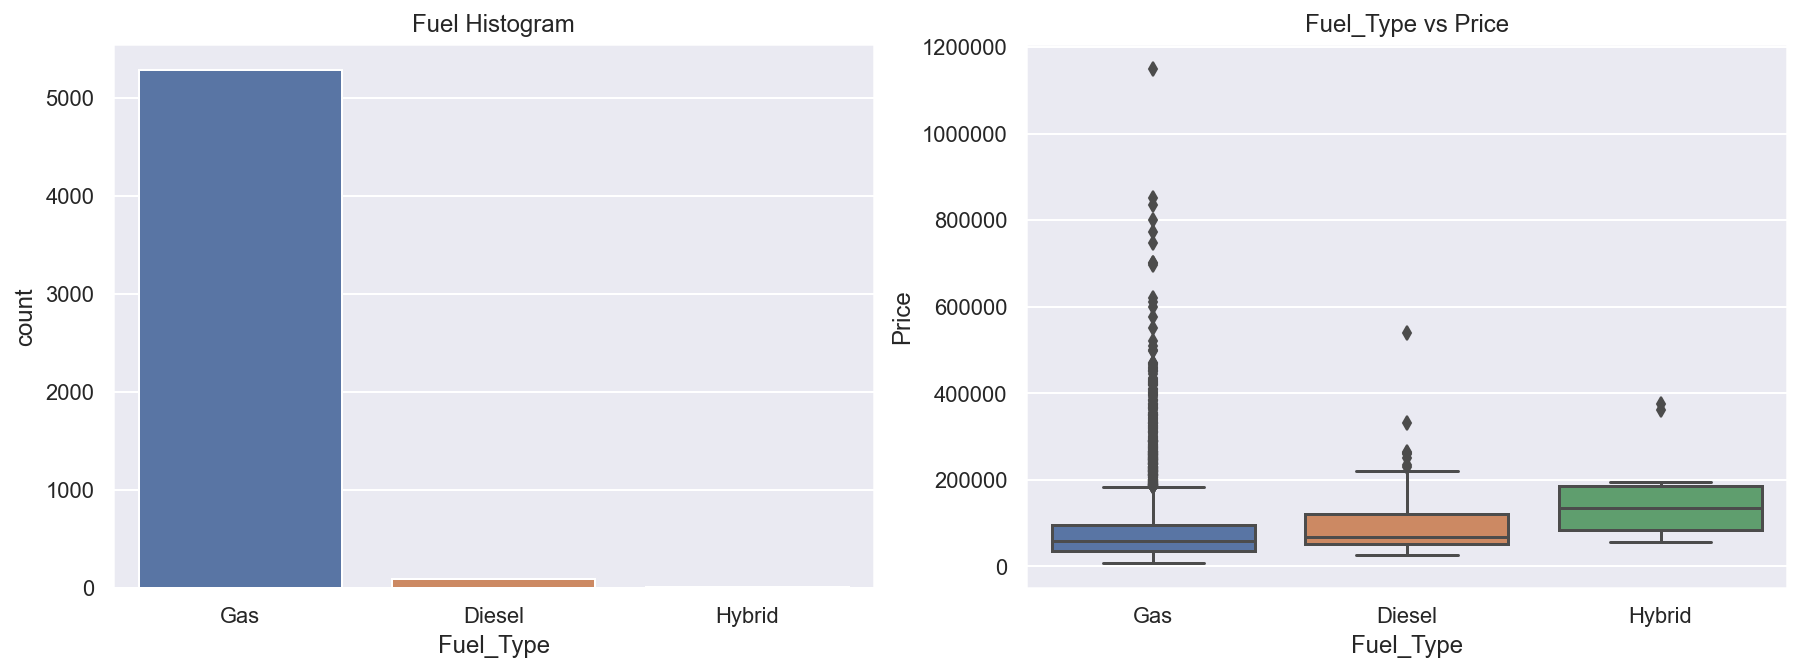

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Fuel Histogram')
sns.countplot(x = 'Fuel_Type' , data = sauc)

plt.subplot(1,2,2)
plt.title('Fuel_Type vs Price')
sns.boxplot(x = 'Fuel_Type' , y = 'Price',data = sauc)

plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()

**Insights:** 

98% of the listed cars are Gas cars. There is only 10 Hybrid cars but they have the highest median price and thier price range is higher 

### Does the Price Differ According to the Gear Type?

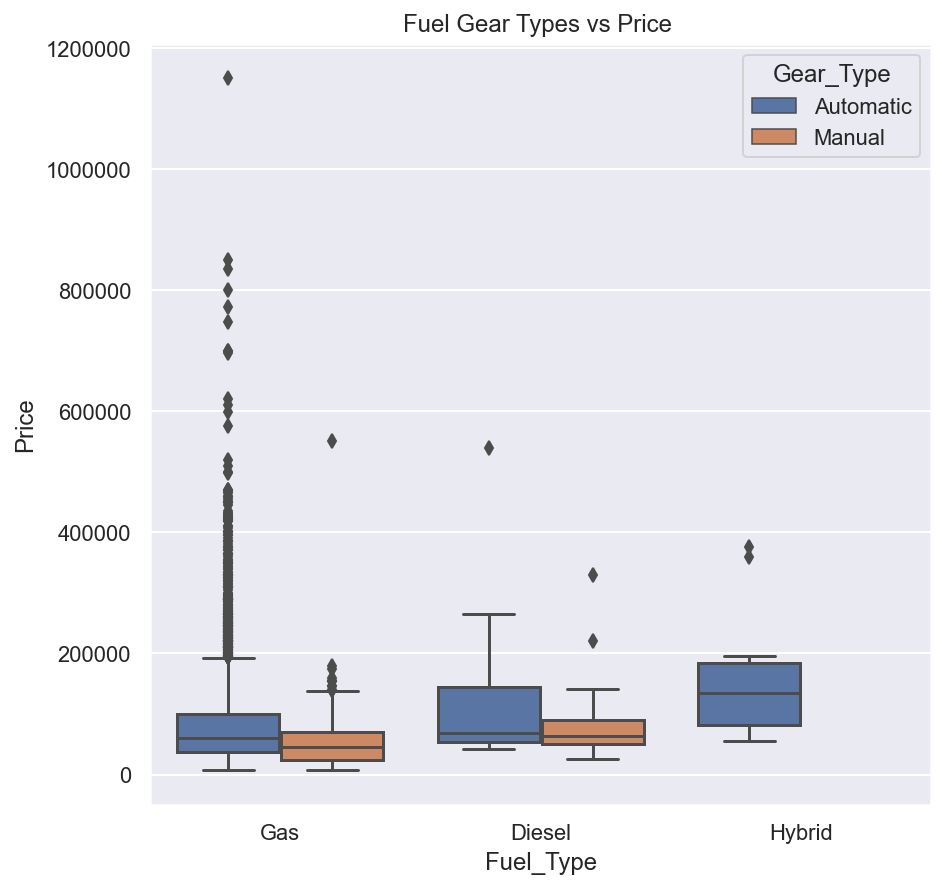

In [34]:
plt.figure(figsize=(7,7)) 
plt.title('Fuel Gear Types vs Price ')

sns.boxplot(y='Price', x = 'Fuel_Type', hue = 'Gear_Type',data=sauc)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

plt.show() 


**Insights:**

The Automatic cars have higher prices 

### Show the density distribution for the price based on the car origin

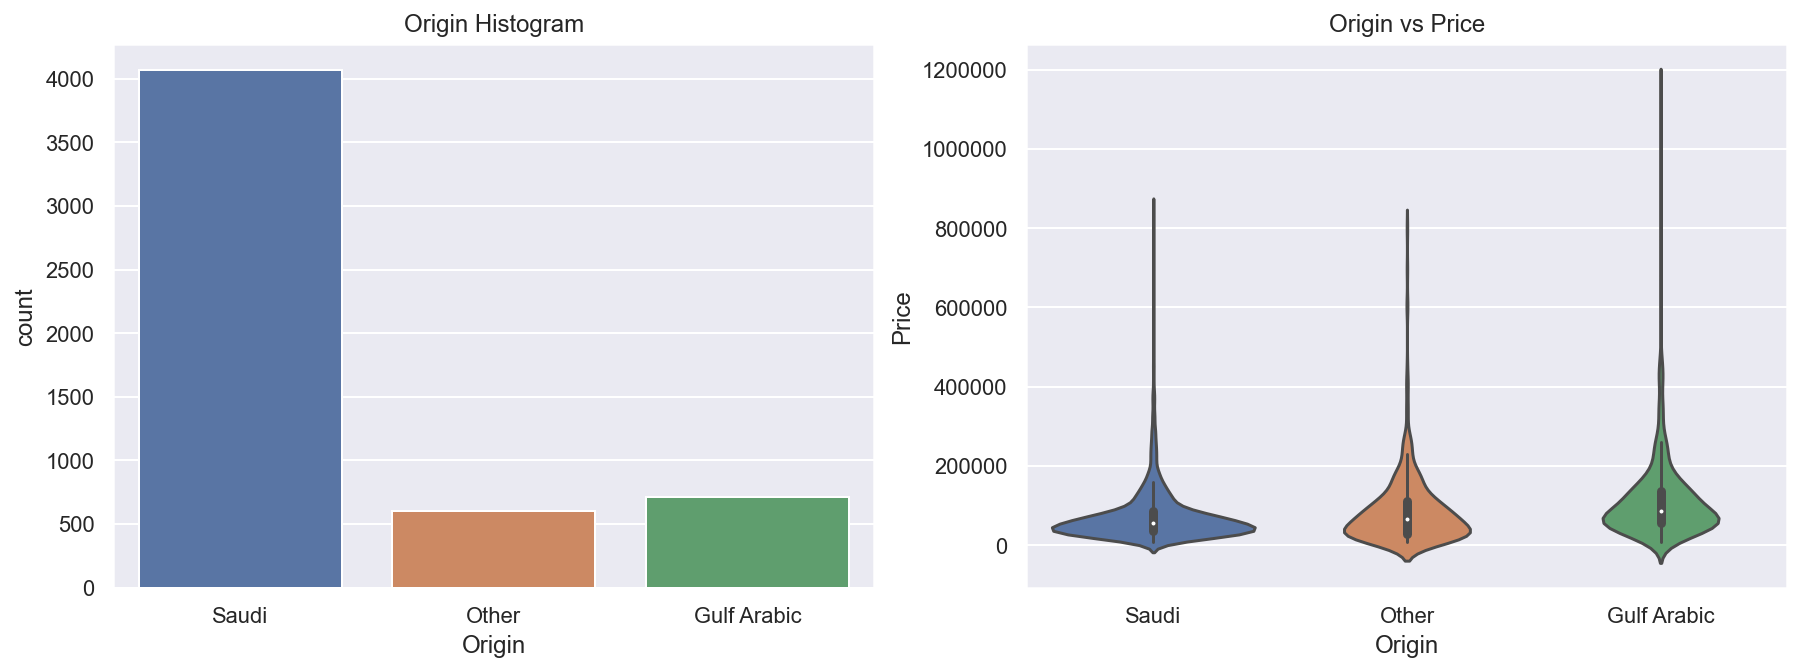

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Origin Histogram')
sns.countplot(x = 'Origin' , data = sauc)

plt.subplot(1,2,2)
plt.title('Origin vs Price')
sns.violinplot(x = 'Origin' , y = 'Price',data = sauc)

plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()
# the plot show that the saudi cars price have a high density between 0-200K. The gulf cars  
# have highest average

**Insights:**

the plot show that the saudi cars price have a high density between 0-200K. The gulf cars  
have highest average

## What is the Avarage Price per Car Model?

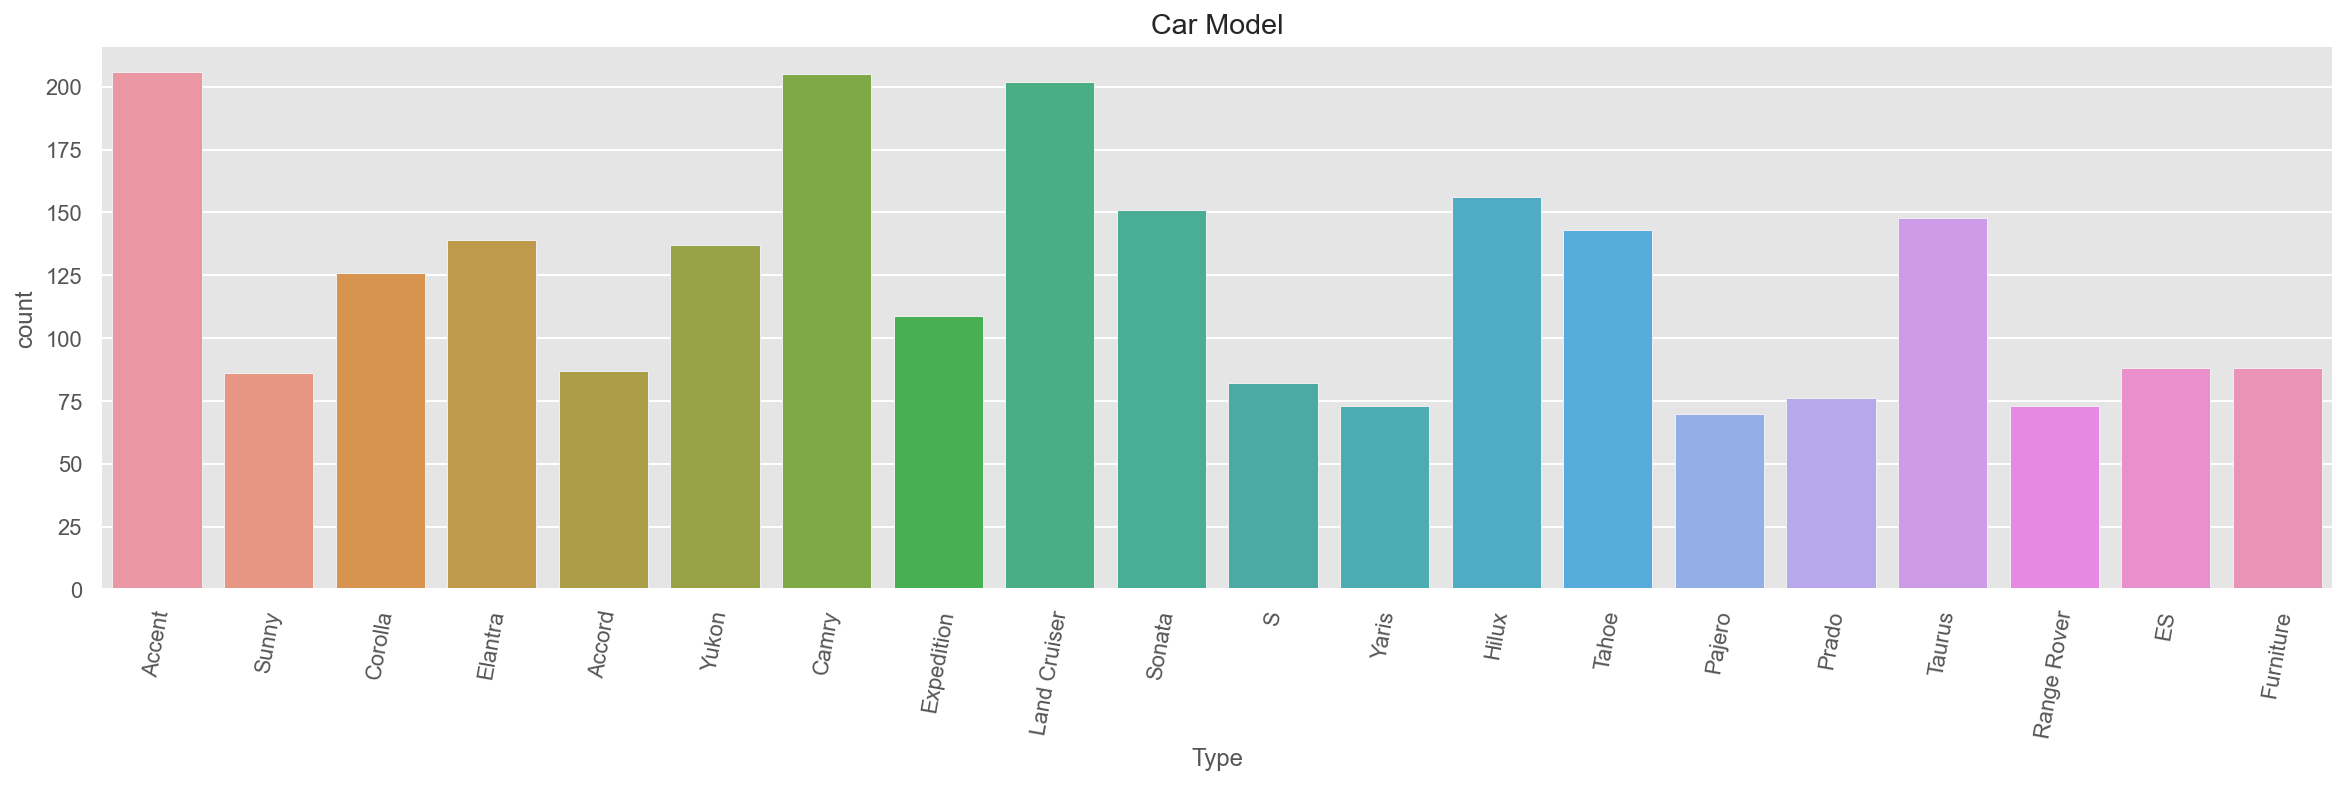

<Figure size 1440x360 with 0 Axes>

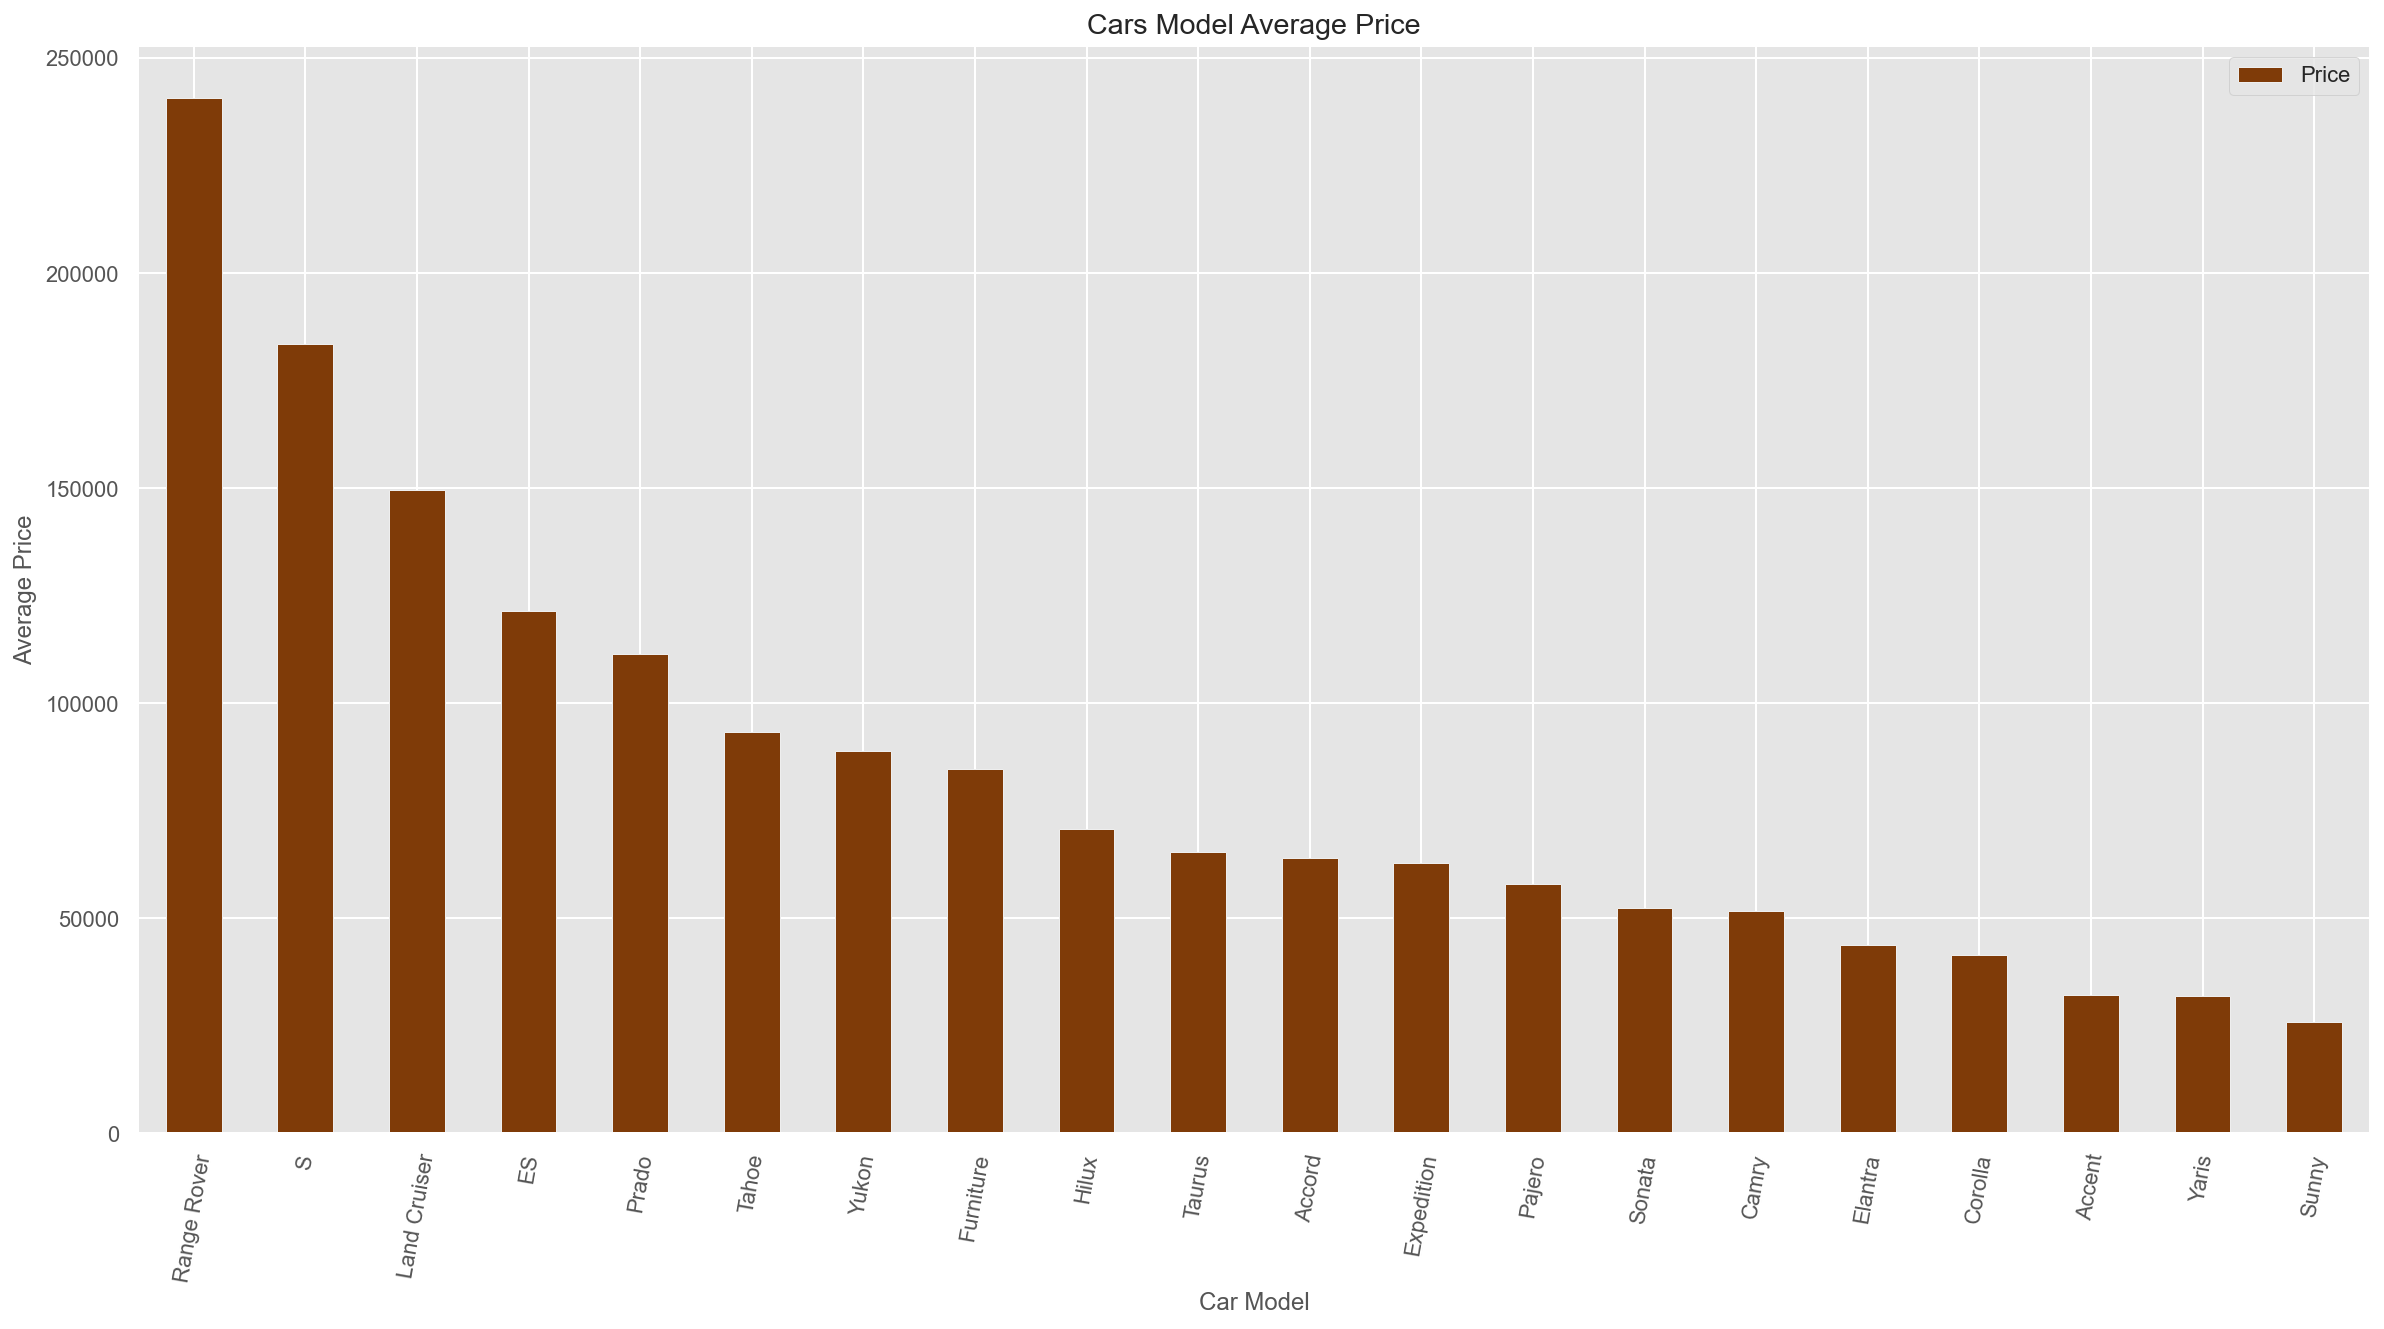

In [52]:
d = dict(sauc['Type'].value_counts().iloc[:20]) 
keysList = list(d.keys())
ndf = pd.DataFrame(sauc[sauc['Type'].isin(keysList)].groupby(['Type'])['Price'].mean().sort_values(ascending = False))
plt.figure(figsize=(20,5))
plt.title('Car Model')
plt.xticks(rotation=80)
plt.xlabel('Car Model')
sns.countplot(x = 'Type' ,data = sauc[sauc['Type'].isin(keysList)])
plt.show();

plt.figure(figsize=(20,5))
ndf.plot.bar(colormap = 'PuOr' )
plt.title('Cars Model Average Price')
plt.xticks(rotation=80)
plt.xlabel('Car Model')
plt.ylabel('Average Price');
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show();


**Insights:** 

Range Rover has the highest average price. If we looked at the most listed cars which are Accent and Land Cruiser. Accent has the second lowest average price whereas the Land is in the third place

## <font color='teal'>Conclusion</font>
#### <font color='black'>
* Cities, from which the cars are mostly sold are Dammam, Riyadh, and Sakaka.
* A sample of Toyota cars(since Toyota has the higher frequency) from 2000 onward shows that Diesel used cars had lower prices in 2005; however, with the time it got higher than Gas used cars. Moreover, note the behavior of the Hybrid used cars.
*
*
*
*
</font>